# StatCan Data on International and Domestic PSI student enrolment, 2011-2021

## imports and setup

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
# Reading in the CSV
df = pd.read_csv("/Users/thomasdoherty/Desktop/canadian-psi-project/psi_data/statcan_data/Statcan-FT-canadian.csv", encoding='utf-8')

In [425]:
df.head(5)

REF_DATE     GEO           DGUID         Field of study  \
0  2011/2012  Canada  2021A000011124  Total, field of study   
1  2012/2013  Canada  2021A000011124  Total, field of study   
2  2013/2014  Canada  2021A000011124  Total, field of study   
3  2014/2015  Canada  2021A000011124  Total, field of study   
4  2015/2016  Canada  2021A000011124  Total, field of study   

          Program type         Credential type          Institution type  \
0  Total, program type  Total, credential type  Total, institution type    
1  Total, program type  Total, credential type  Total, institution type    
2  Total, program type  Total, credential type  Total, institution type    
3  Total, program type  Total, credential type  Total, institution type    
4  Total, program type  Total, credential type  Total, institution type    

  Registration status Status of student in Canada         Gender  ... UOM_ID  \
0   Full-time student           Canadian students  Total, gender  ...    223   
1   Full-time student           Canadian students  Total, gender  ...    223   
2   Full-time student           Canadian students  Total, gender  ...    223   
3   Full-time student           Canadian students  Total, gender  ...    223   
4   Full-time student           Canadian students  Total, gender  ...    223   

   SCALAR_FACTOR SCALAR_ID       VECTOR       COORDINATE      VALUE  STATUS  \
0          units         0  v1438513037  1.1.1.1.1.2.2.1  1353324.0     NaN   
1          units         0  v1438513037  1.1.1.1.1.2.2.1  1366443.0     NaN   
2          units         0  v1438513037  1.1.1.1.1.2.2.1  1378959.0     NaN   
3          units         0  v1438513037  1.1.1.1.1.2.2.1  1366716.0     NaN   
4          units         0  v1438513037  1.1.1.1.1.2.2.1  1355496.0     NaN   

  SYMBOL  TERMINATED  DECIMALS  
0    NaN         NaN         0  
1    NaN         NaN         0  
2    NaN         NaN         0  
3    NaN         NaN         0  
4    NaN         NaN         0  

[5 rows x 21 columns]

Lots of trash columns we can remove from the above

In [426]:
print(df.columns)

Index(['REF_DATE', 'GEO', 'DGUID', 'Field of study', 'Program type',
       'Credential type', 'Institution type', 'Registration status',
       'Status of student in Canada', 'Gender', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')


In [427]:
df.drop(['DGUID', 'Field of study', 'Program type', 'Credential type', 'Institution type', 'Gender', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS' ], axis=1, inplace=True)

Cleaned off most columns, keeping Full-time Canadian to show the student type being investigated

In [428]:
# rename columns
df.rename(columns={"REF_DATE": "FY Start","GEO": "School/Locality", "Status of student in Canada": "Status", "VALUE": "Enrolment"}, inplace=True)

In [429]:
df["FY Start"] = df["FY Start"].apply(lambda x: int(x[:4]))

In [430]:
df

FY Start                  School/Locality Registration status  \
0         2011                           Canada   Full-time student   
1         2012                           Canada   Full-time student   
2         2013                           Canada   Full-time student   
3         2014                           Canada   Full-time student   
4         2015                           Canada   Full-time student   
...        ...                              ...                 ...   
2743      2017  Nunavut Arctic College, Nunavut   Full-time student   
2744      2018  Nunavut Arctic College, Nunavut   Full-time student   
2745      2019  Nunavut Arctic College, Nunavut   Full-time student   
2746      2020  Nunavut Arctic College, Nunavut   Full-time student   
2747      2021  Nunavut Arctic College, Nunavut   Full-time student   

                 Status  Enrolment  
0     Canadian students  1353324.0  
1     Canadian students  1366443.0  
2     Canadian students  1378959.0  
3     Canadian students  1366716.0  
4     Canadian students  1355496.0  
...                 ...        ...  
2743  Canadian students      495.0  
2744  Canadian students      693.0  
2745  Canadian students      750.0  
2746  Canadian students      843.0  
2747  Canadian students      873.0  

[2748 rows x 5 columns]

### Split up the colleges/universities from Canada and the provincial totals

In [431]:
# List of provinces and territories in Canada
canadian_provinces_territories = [
    "Alberta", "British Columbia", "Manitoba", "New Brunswick", "Newfoundland and Labrador",
    "Nova Scotia", "Ontario", "Prince Edward Island", "Quebec", "Saskatchewan",
    "Northwest Territories", "Nunavut", "Yukon", "Canada"
]

# Convert the list to a set for fast exact matching
province_set = set(canadian_provinces_territories)

# Create a mask for exact matches with Canada or any province/territory
exact_match_mask = df['School/Locality'].isin(province_set)

# Create the Canada & Provinces DataFrame (exact matches)
canada_df = df[exact_match_mask]

# For rows that do not match exactly, extract the college/university name before the last comma
# We will create a mask where School/Locality does not match any province or Canada
non_canada_df = df[~exact_match_mask]

# Correctly extract the institution name (everything before the last comma)
# Ensure you use rsplit correctly, specifying the delimiter (comma) and maxsplit=1
non_canada_df['Institution Name'] = non_canada_df['School/Locality'].str.rsplit(',', n=1).str[0]

# Now, `canada_df` contains rows where School/Locality is exactly a province or territory, and
# `non_canada_df` contains rows with college/university names (before the last comma)
# If you want to merge both DataFrames back into a single one:
colleges_universities_df = non_canada_df.drop(columns=['Institution Name'])

# Display the results
print(f"Number of rows in canada_df: {len(canada_df)}")
print(f"Number of rows in colleges_universities_df: {len(colleges_universities_df)}")

# save the DataFrames to CSVs if we want
# canada_df.to_csv('canada_provinces.csv', index=False)
# colleges_universities_df.to_csv('colleges_universities.csv', index=False)


Number of rows in canada_df: 154
Number of rows in colleges_universities_df: 2594


/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_38563/3190832476.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [432]:
colleges_universities_df

FY Start                                    School/Locality  \
22        2011  Memorial University of Newfoundland, Newfoundl...   
23        2012  Memorial University of Newfoundland, Newfoundl...   
24        2013  Memorial University of Newfoundland, Newfoundl...   
25        2014  Memorial University of Newfoundland, Newfoundl...   
26        2015  Memorial University of Newfoundland, Newfoundl...   
...        ...                                                ...   
2743      2017                    Nunavut Arctic College, Nunavut   
2744      2018                    Nunavut Arctic College, Nunavut   
2745      2019                    Nunavut Arctic College, Nunavut   
2746      2020                    Nunavut Arctic College, Nunavut   
2747      2021                    Nunavut Arctic College, Nunavut   

     Registration status             Status  Enrolment  
22     Full-time student  Canadian students    14097.0  
23     Full-time student  Canadian students    13923.0  
24     Full-time student  Canadian students    13611.0  
25     Full-time student  Canadian students    12996.0  
26     Full-time student  Canadian students    12795.0  
...                  ...                ...        ...  
2743   Full-time student  Canadian students      495.0  
2744   Full-time student  Canadian students      693.0  
2745   Full-time student  Canadian students      750.0  
2746   Full-time student  Canadian students      843.0  
2747   Full-time student  Canadian students      873.0  

[2594 rows x 5 columns]

In [433]:
canada_df['School/Locality'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon',
       'Northwest Territories', 'Nunavut'], dtype=object)

## Visualising Canadian Domestic student enrolment 2011-2021 (initial, to be refined)

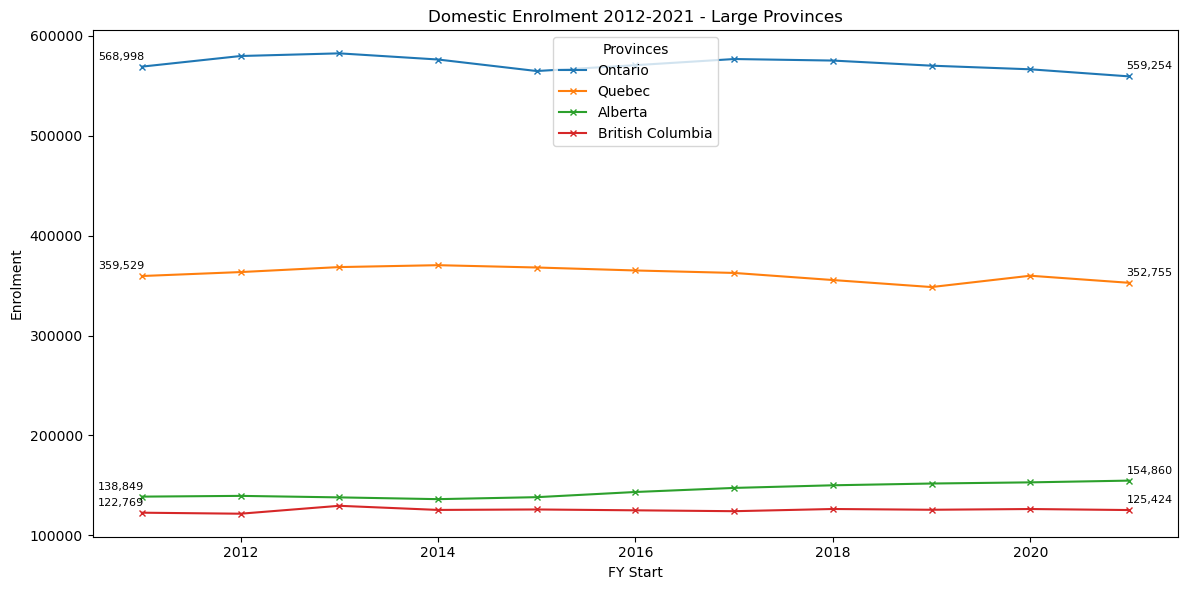

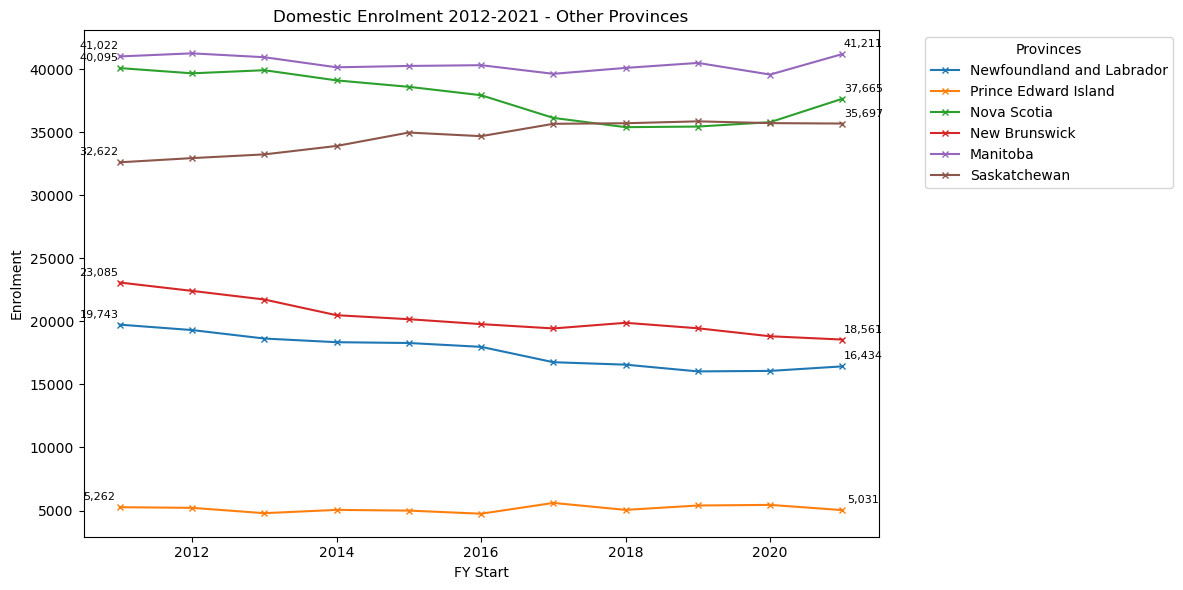

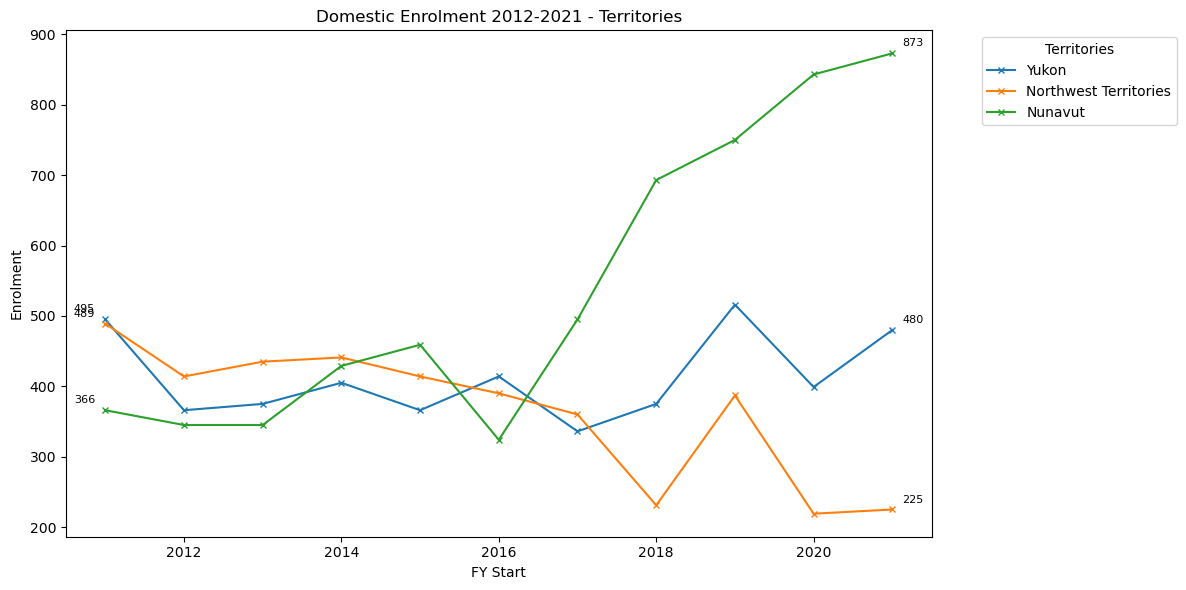

In [434]:
# Filter out rows where 'School/Locality' is "Canada" - the national figure will mess up the scale
provinces_df = canada_df[~canada_df['School/Locality'].isin(["Canada"])]

# Define the provinces and territories for the three separate graphs
large_population_provinces = ["Ontario", "Quebec", "Alberta", "British Columbia"]
territories = ["Yukon", "Northwest Territories", "Nunavut"]
other_provinces = [
    province for province in provinces_df['School/Locality'].unique()
    if province not in large_population_provinces and province not in territories
]

# Function to annotate the first and last y-values
def annotate_first_and_last_points(ax, x_data, y_data, label):
    if len(x_data) > 0 and len(y_data) > 0:
        # Annotate the first point (Fiscal Year 2011)
        ax.annotate(f'{y_data.iloc[0]:,.0f}', (x_data.iloc[0], y_data.iloc[0]), # iloc[0] is the first value
                    textcoords="offset points", xytext=(-15, 5), ha='center', fontsize=8)
        
        # Annotate the last point (Fiscal Year 2021)
        ax.annotate(f'{y_data.iloc[-1]:,.0f}', (x_data.iloc[-1], y_data.iloc[-1]), # iloc[-1] is the last value in the Series
                    textcoords="offset points", xytext=(15, 5), ha='center', fontsize=8)

# Create the first graph for large population provinces
fig, ax = plt.subplots(figsize=(12, 6))
for province in large_population_provinces:
    province_data = provinces_df[provinces_df['School/Locality'] == province]
    ax.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, province_data['FY Start'], province_data['Enrolment'], label=province)
ax.set_title('Domestic Enrolment 2012-2021 - Large Provinces')
ax.set_xlabel('FY Start')
ax.set_ylabel('Enrolment')
ax.legend(title='Provinces')
plt.tight_layout()
plt.show()

# Create the second graph for other provinces
fig, ax = plt.subplots(figsize=(12, 6))
for province in other_provinces:
    province_data = provinces_df[provinces_df['School/Locality'] == province]
    ax.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, province_data['FY Start'], province_data['Enrolment'], province)
ax.set_title('Domestic Enrolment 2012-2021 - Other Provinces')
ax.set_xlabel('FY Start')
ax.set_ylabel('Enrolment')
ax.legend(title='Provinces', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create the third graph for territories
fig, ax = plt.subplots(figsize=(12, 6))
for territory in territories:
    territory_data = provinces_df[provinces_df['School/Locality'] == territory]
    ax.plot(
        territory_data['FY Start'],
        territory_data['Enrolment'],
        label=territory,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, territory_data['FY Start'], territory_data['Enrolment'], territory)
ax.set_title('Domestic Enrolment 2012-2021 - Territories')
ax.set_xlabel('FY Start')
ax.set_ylabel('Enrolment')
ax.legend(title='Territories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [435]:
# Split 'School/Locality' by ", " from the right and extract school name and province/territory
colleges_universities_df[['School Name', 'Province/Territory']] = colleges_universities_df['School/Locality'].str.rsplit(", ", n=1, expand=True)

# Drop the original 'School/Locality' column if no longer needed
colleges_universities_df.drop(columns=['School/Locality'], inplace=True)

# Display the updated dataframe
print(colleges_universities_df.head())

    FY Start Registration status             Status  Enrolment  \
22      2011   Full-time student  Canadian students    14097.0   
23      2012   Full-time student  Canadian students    13923.0   
24      2013   Full-time student  Canadian students    13611.0   
25      2014   Full-time student  Canadian students    12996.0   
26      2015   Full-time student  Canadian students    12795.0   

                            School Name         Province/Territory  
22  Memorial University of Newfoundland  Newfoundland and Labrador  
23  Memorial University of Newfoundland  Newfoundland and Labrador  
24  Memorial University of Newfoundland  Newfoundland and Labrador  
25  Memorial University of Newfoundland  Newfoundland and Labrador  
26  Memorial University of Newfoundland  Newfoundland and Labrador  


In [436]:
colleges_universities_df

FY Start Registration status             Status  Enrolment  \
22        2011   Full-time student  Canadian students    14097.0   
23        2012   Full-time student  Canadian students    13923.0   
24        2013   Full-time student  Canadian students    13611.0   
25        2014   Full-time student  Canadian students    12996.0   
26        2015   Full-time student  Canadian students    12795.0   
...        ...                 ...                ...        ...   
2743      2017   Full-time student  Canadian students      495.0   
2744      2018   Full-time student  Canadian students      693.0   
2745      2019   Full-time student  Canadian students      750.0   
2746      2020   Full-time student  Canadian students      843.0   
2747      2021   Full-time student  Canadian students      873.0   

                              School Name         Province/Territory  
22    Memorial University of Newfoundland  Newfoundland and Labrador  
23    Memorial University of Newfoundland  Newfoundland and Labrador  
24    Memorial University of Newfoundland  Newfoundland and Labrador  
25    Memorial University of Newfoundland  Newfoundland and Labrador  
26    Memorial University of Newfoundland  Newfoundland and Labrador  
...                                   ...                        ...  
2743               Nunavut Arctic College                    Nunavut  
2744               Nunavut Arctic College                    Nunavut  
2745               Nunavut Arctic College                    Nunavut  
2746               Nunavut Arctic College                    Nunavut  
2747               Nunavut Arctic College                    Nunavut  

[2594 rows x 6 columns]

In [437]:
# light cleaing - remove "of Applied Arts & Technology"ArithmeticError# Remove "of Applied Arts and Technology" from all school names
colleges_universities_df['School Name'] = colleges_universities_df['School Name'].str.replace(
    " of Applied Arts and Technology", "", regex=False
)

colleges_universities_df['School Name'] = colleges_universities_df['School Name'].str.replace(
    " Institute of Technology and Advanced Learning", "", regex=False
)

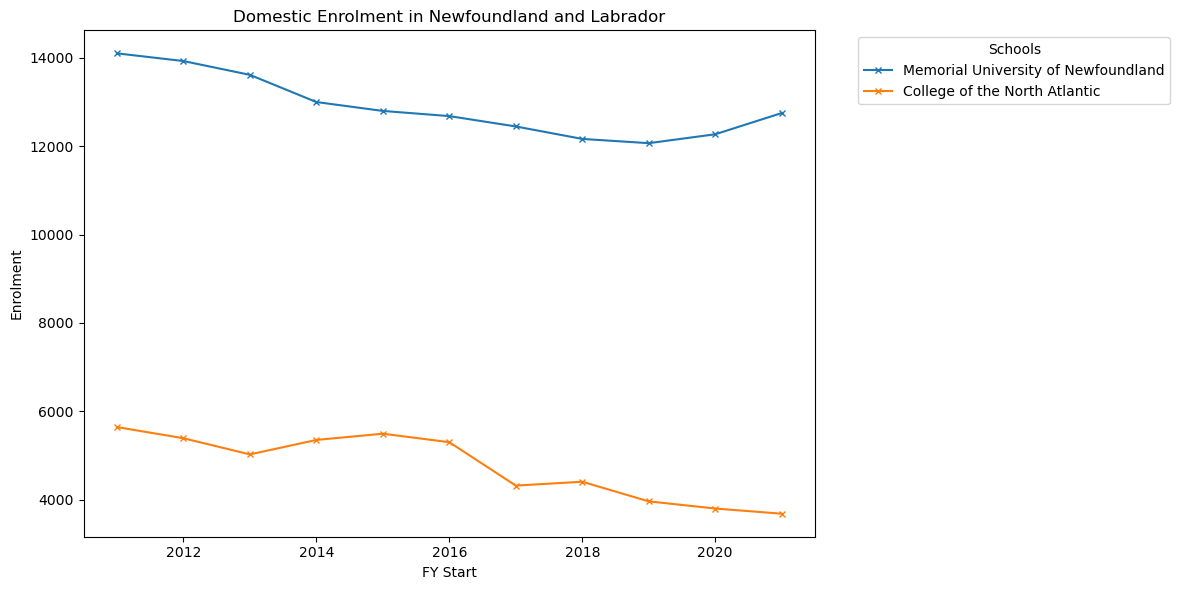

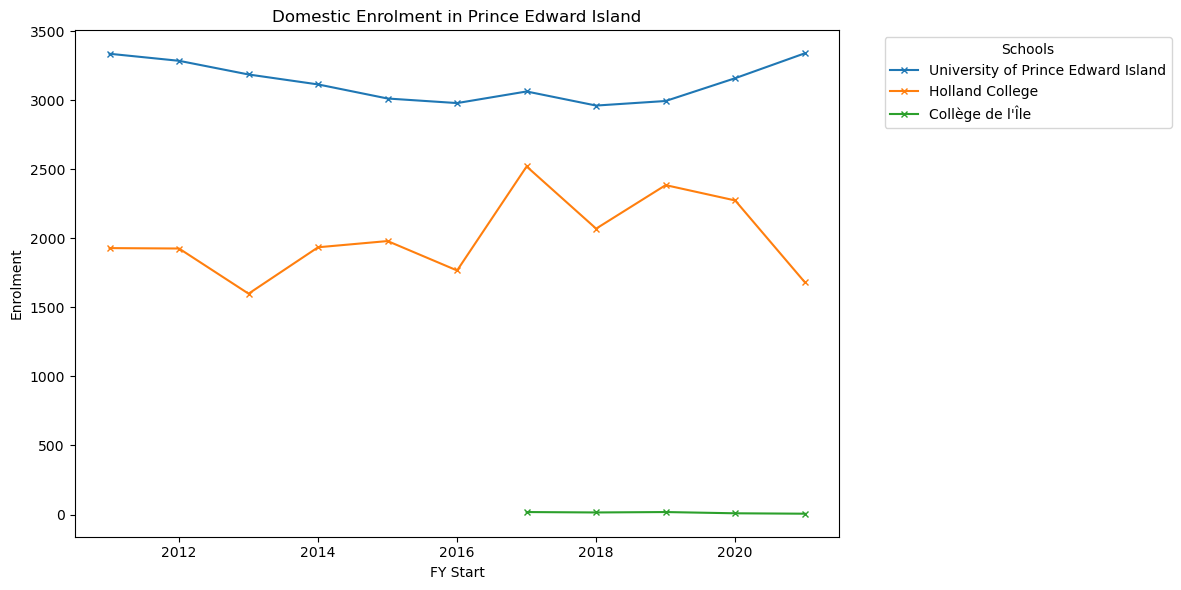

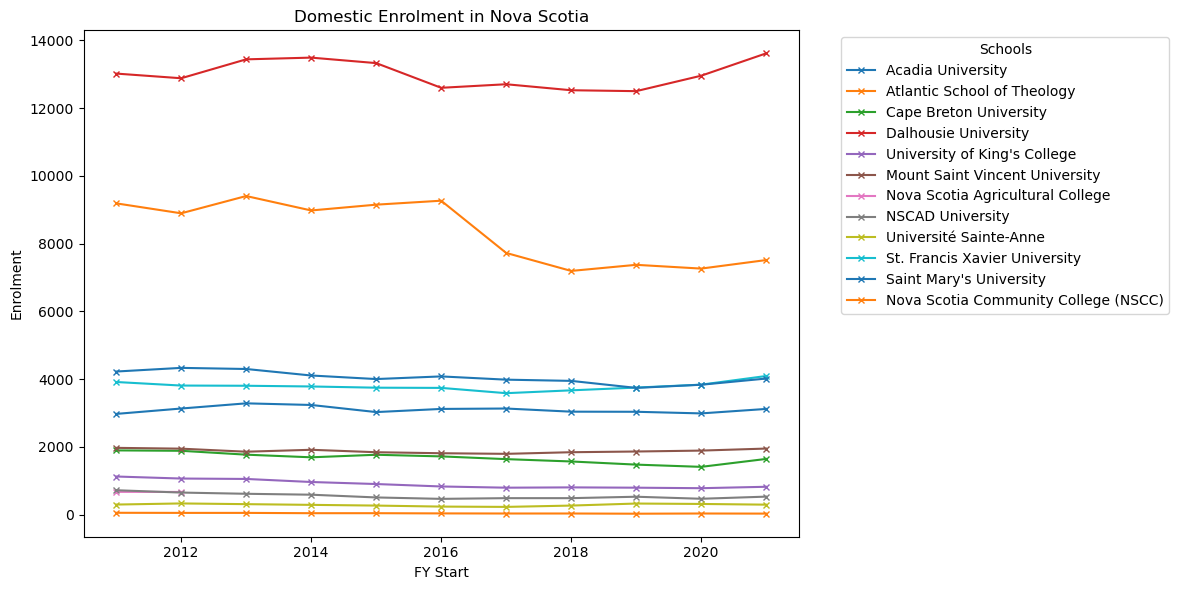

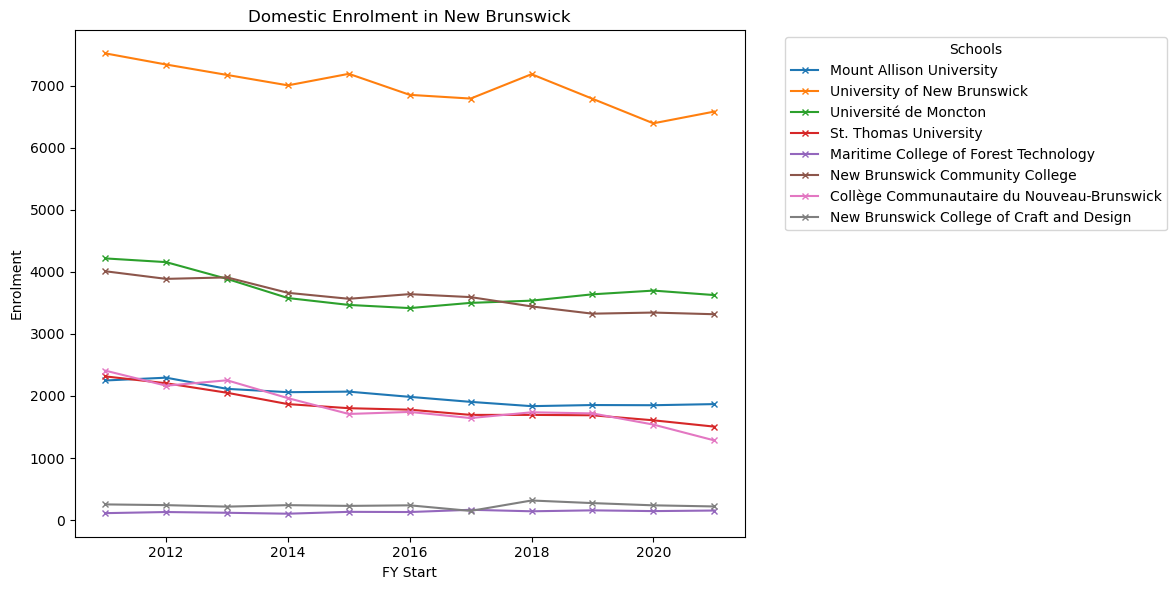

/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_38563/3944359315.py:34: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



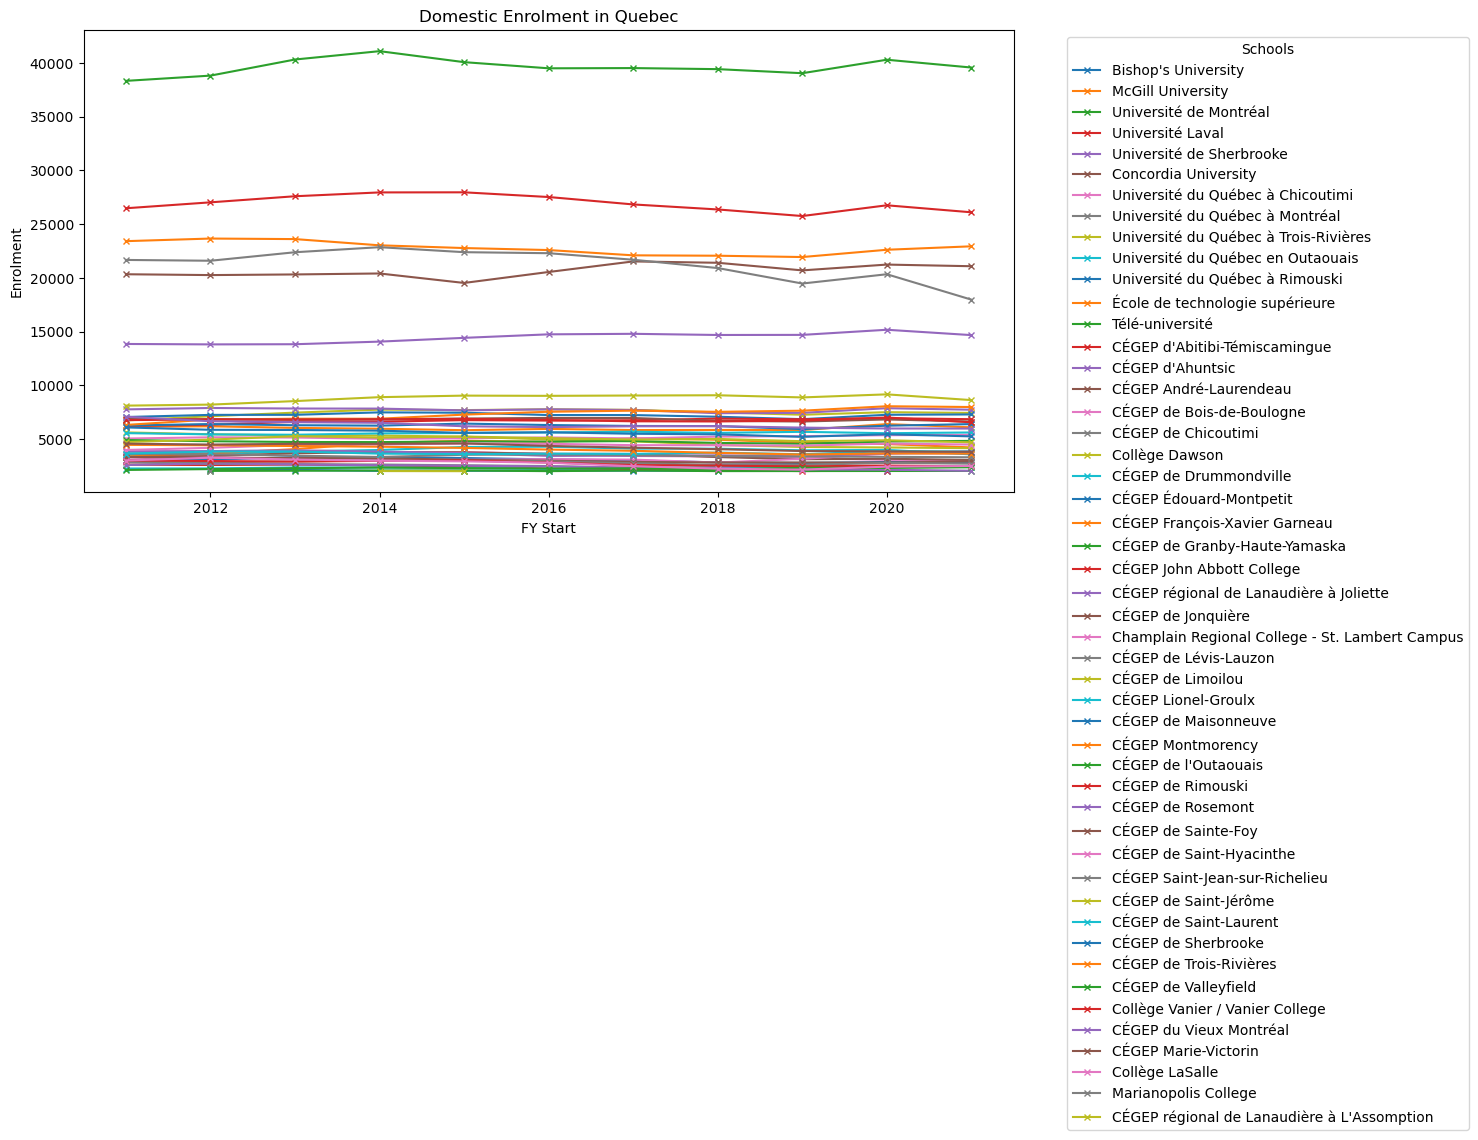

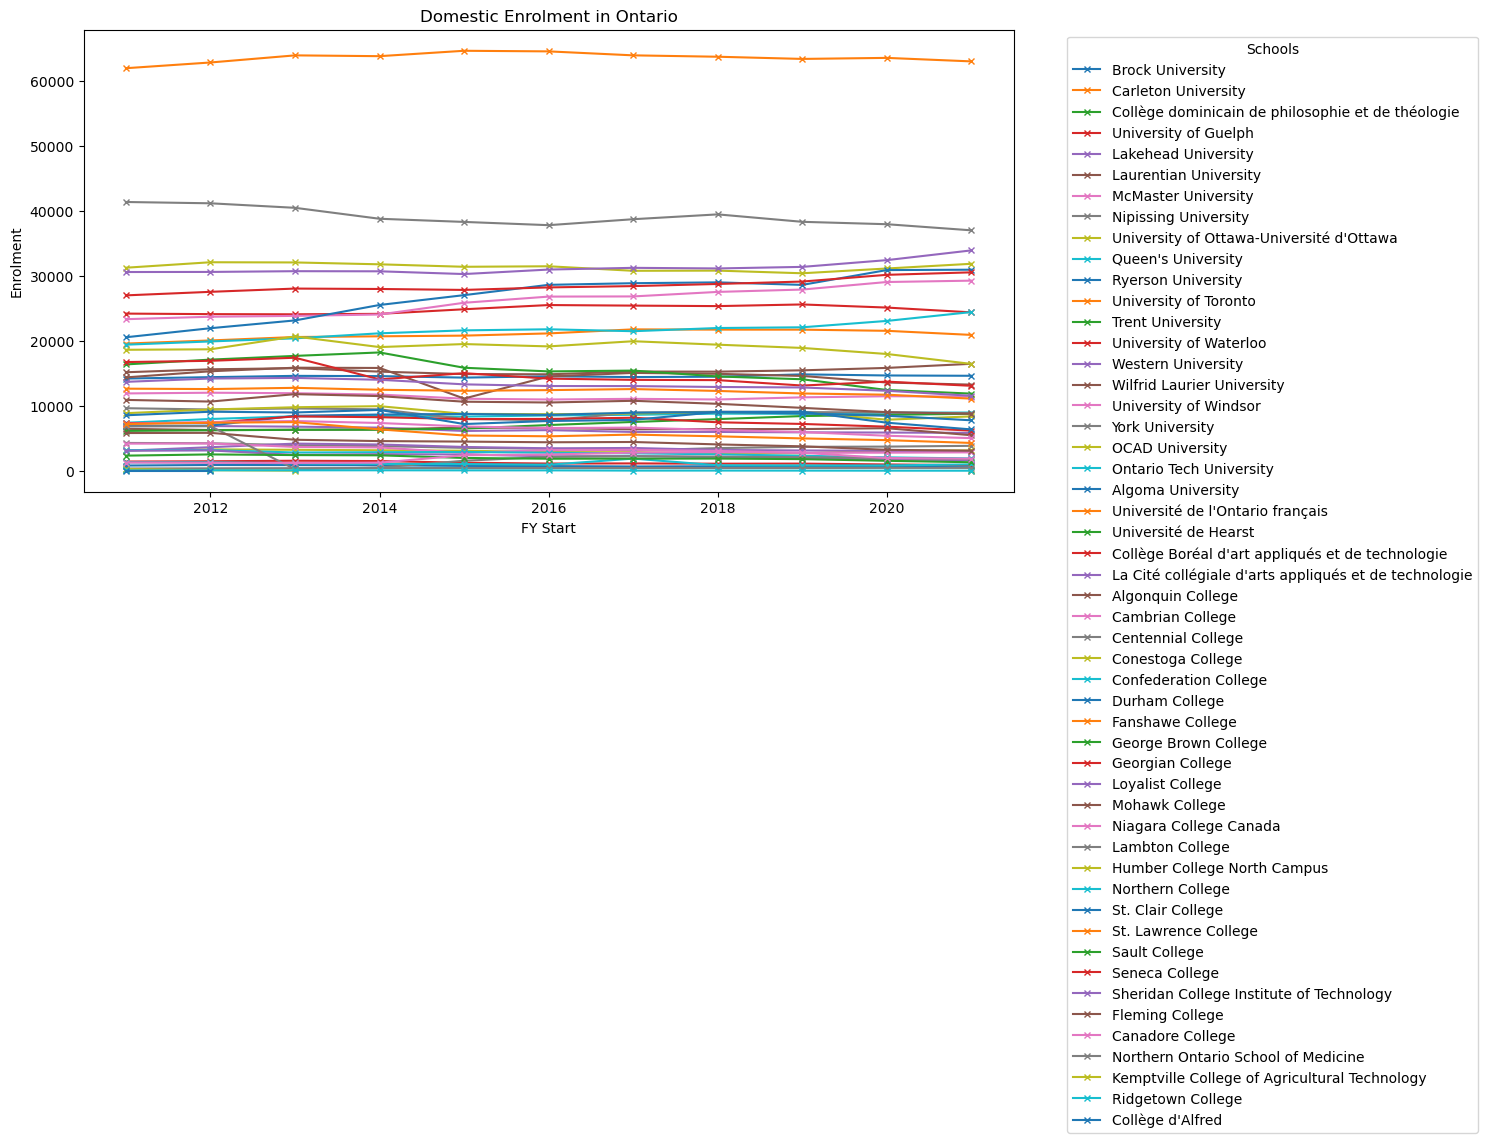

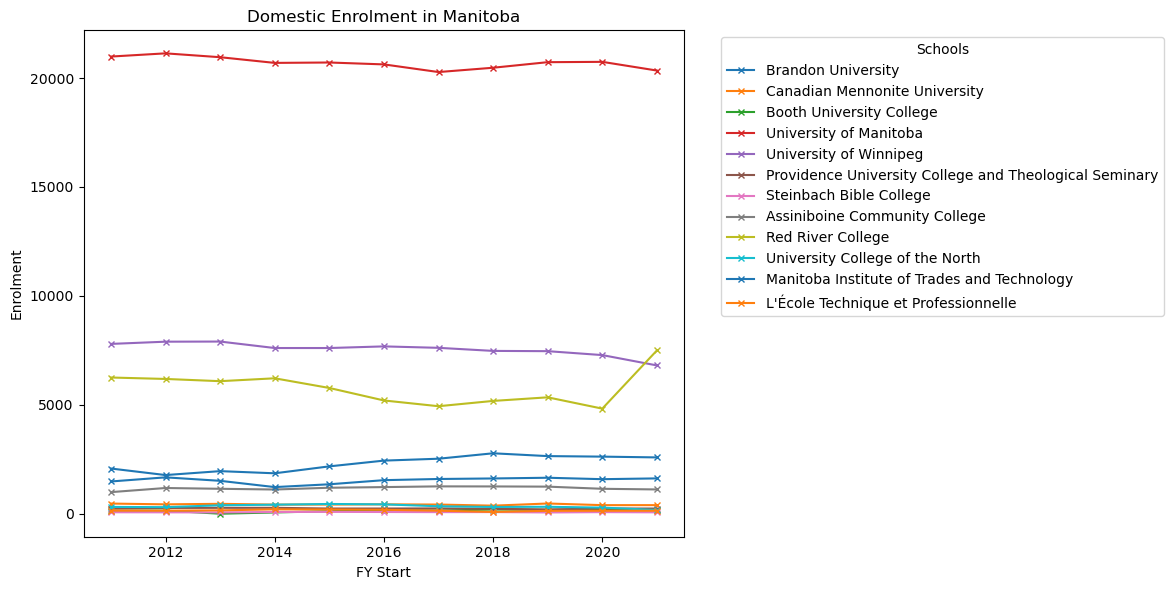

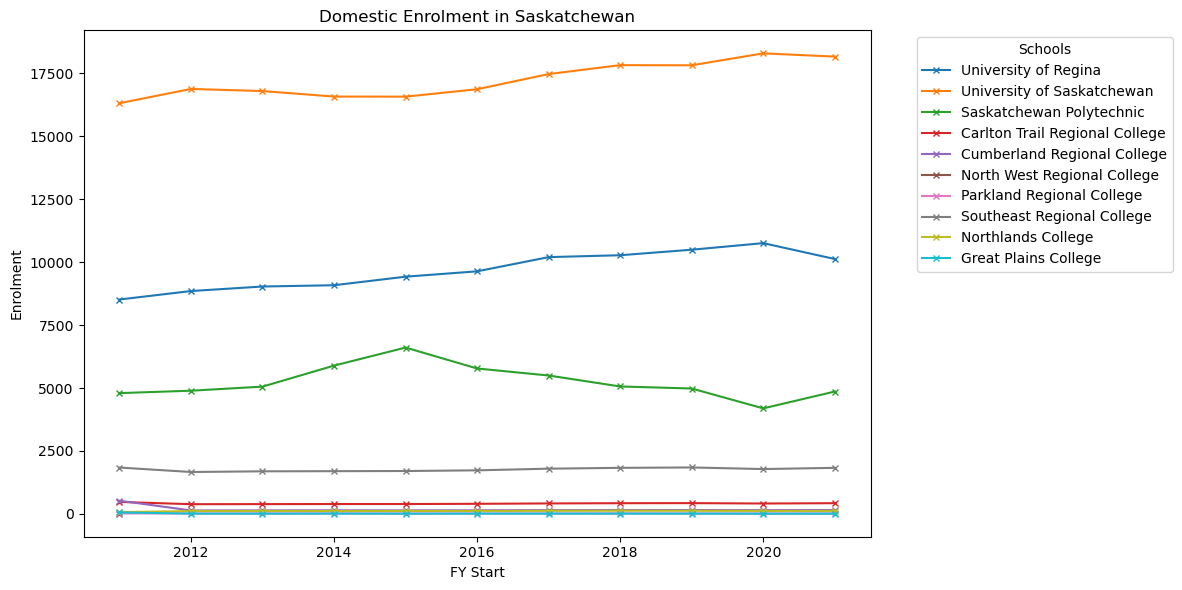

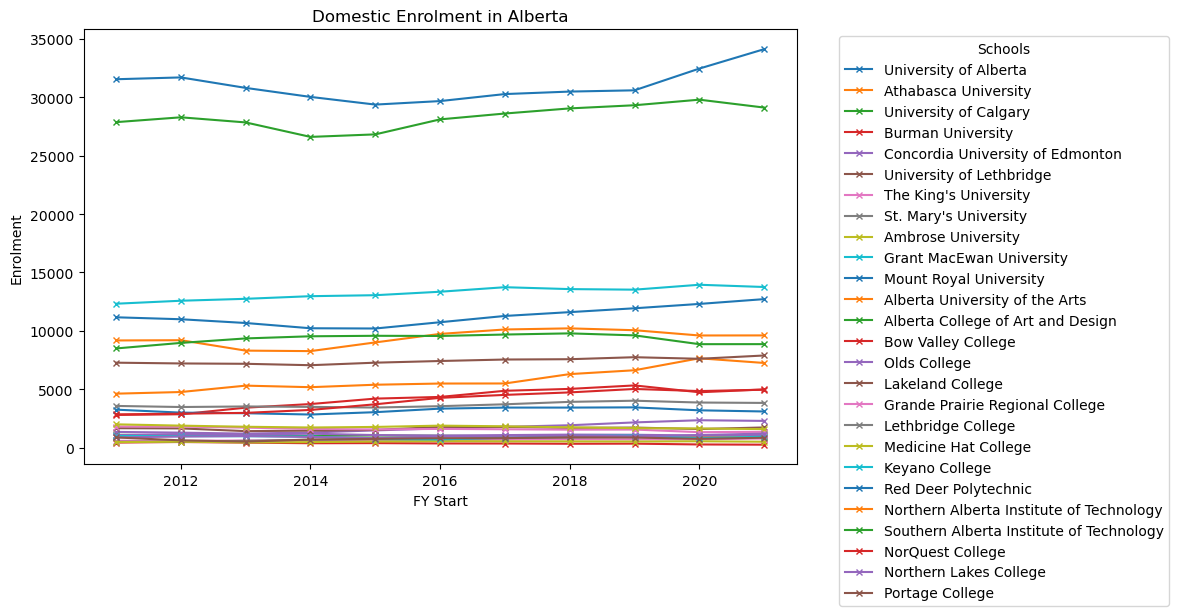

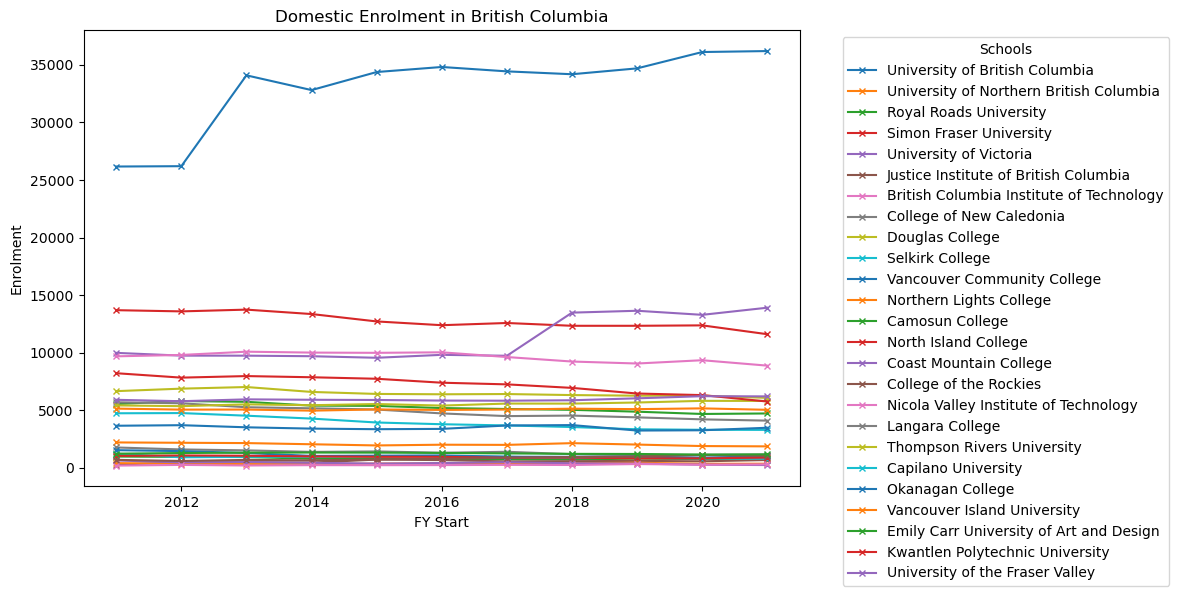

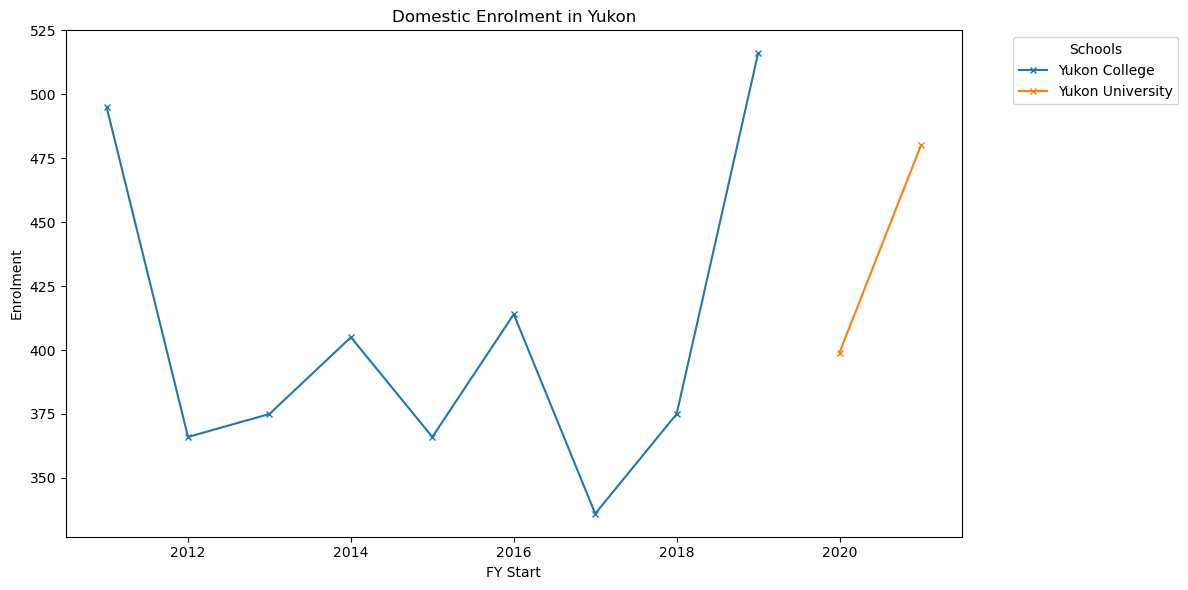

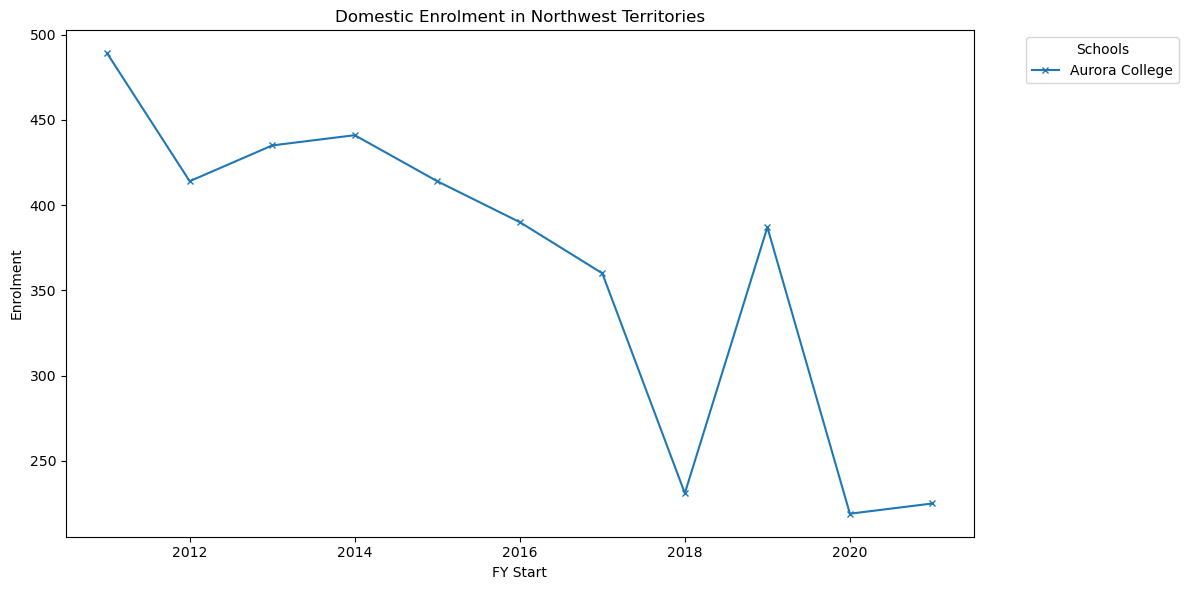

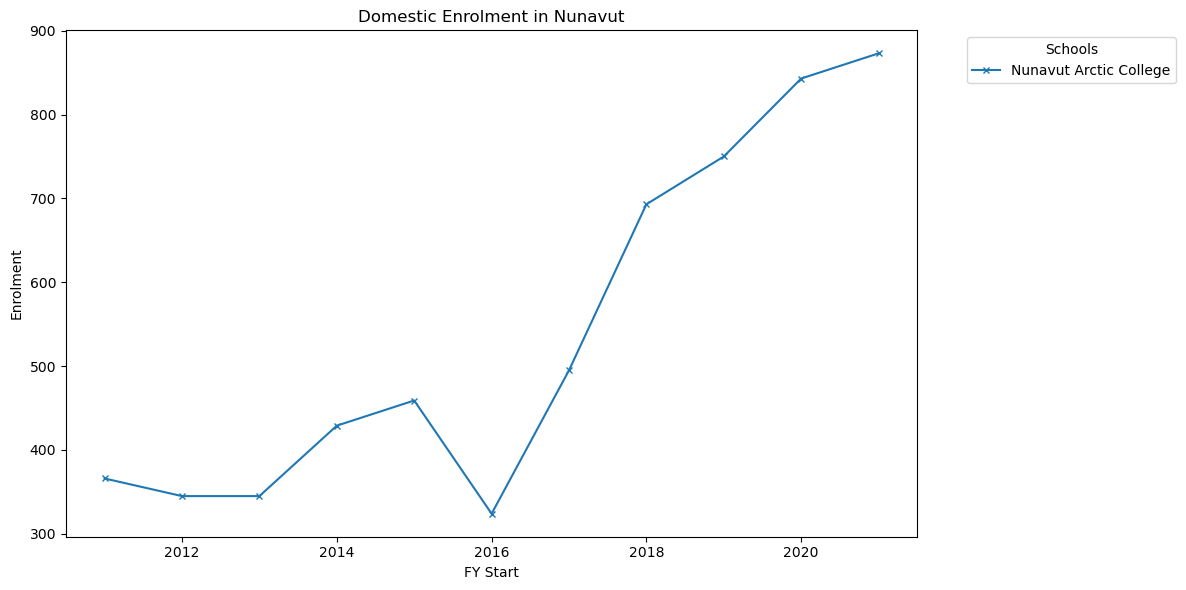

In [438]:
# Get the unique provinces/territories from the dataframe
unique_provinces_territories = colleges_universities_df['Province/Territory'].unique()

# Iterate over each province/territory to create separate graphs
for province in unique_provinces_territories:
    # Filter the data for the current province/territory
    province_data = colleges_universities_df[colleges_universities_df['Province/Territory'] == province]

    # Create a new figure for the province
    plt.figure(figsize=(12, 6))

    # There are a LOT of small CEGEPs in Quebec that make the display tough to read, below will filter out under 2000 enrolment domestically
    if province == "Quebec":
        province_data = province_data[province_data['Enrolment'] >= 2000]

    # Plot enrolment trends for each school in the current province/territory
    for school in province_data['School Name'].unique():
        school_data = province_data[province_data['School Name'] == school]
        plt.plot(
            school_data['FY Start'],
            school_data['Enrolment'],
            label=school,
            marker='x',
            markersize=4
        )

    # Set the title and labels
    plt.title(f'Domestic Enrolment in {province}')
    plt.xlabel('FY Start')
    plt.ylabel('Enrolment')

    # Display legend and layout
    plt.legend(title='Schools', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## International Students from Statcan info 2011-2021

In [439]:
# Try reading the CSV with a different encoding
df_intl = pd.read_csv("/Users/thomasdoherty/Desktop/canadian-psi-project/psi_data/statcan_data/statcan-FT-intl.csv", encoding='utf-8')

In [440]:
df_intl.drop(['DGUID', 'Field of study', 'Program type', 'Credential type', 'Institution type', 'Gender', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS' ], axis=1, inplace=True)

In [441]:
# rename columns
df_intl.rename(columns={"REF_DATE": "FY Start","GEO": "School/Locality", "Status of student in Canada": "Status", "VALUE": "Enrolment"}, inplace=True)

In [442]:
df_intl["FY Start"] = df_intl["FY Start"].apply(lambda x: int(x[:4]))

In [443]:
df_intl

FY Start                        School/Locality Registration status  \
0         2011                                 Canada   Full-time student   
1         2012                                 Canada   Full-time student   
2         2013                                 Canada   Full-time student   
3         2014                                 Canada   Full-time student   
4         2015                                 Canada   Full-time student   
...        ...                                    ...                 ...   
2565      2016                  Northwest Territories   Full-time student   
2566      2011  Aurora College, Northwest Territories   Full-time student   
2567      2016  Aurora College, Northwest Territories   Full-time student   
2568      2014                                Nunavut   Full-time student   
2569      2014        Nunavut Arctic College, Nunavut   Full-time student   

                      Status  Enrolment  
0     International students   127467.0  
1     International students   141675.0  
2     International students   160038.0  
3     International students   181086.0  
4     International students   195063.0  
...                      ...        ...  
2565  International students        0.0  
2566  International students        3.0  
2567  International students        0.0  
2568  International students        3.0  
2569  International students        3.0  

[2570 rows x 5 columns]

In [444]:
# same as above to split provinces and territories with variables set above

# Create a mask for exact matches with Canada or any province/territory
exact_match_mask = df_intl['School/Locality'].isin(province_set)

# Create the Canada & Provinces DataFrame (exact matches)
canada_df_intl = df_intl[exact_match_mask]

# For rows that do not match exactly, extract the college/university name before the last comma
# We will create a mask where School/Locality does not match any province or Canada
non_canada_df_intl = df_intl[~exact_match_mask]

# Correctly extract the institution name (everything before the last comma)
# Ensure you use rsplit correctly, specifying the delimiter (comma) and maxsplit=1
non_canada_df_intl['Institution Name'] = non_canada_df_intl['School/Locality'].str.rsplit(',', n=1).str[0]

# Now, `canada_df` contains rows where School/Locality is exactly a province or territory, and
# `non_canada_df` contains rows with college/university names (before the last comma)
# If you want to merge both DataFrames back into a single one:
colleges_universities_df_intl = non_canada_df_intl.drop(columns=['Institution Name'])

# Display the results
print(f"Number of rows in canada_df: {len(canada_df)}")
print(f"Number of rows in colleges_universities_df: {len(colleges_universities_df)}")

# Optionally, save the DataFrames to CSVs
# canada_df.to_csv('canada_provinces.csv', index=False)
# colleges_universities_df.to_csv('colleges_universities.csv', index=False)

Number of rows in canada_df: 154
Number of rows in colleges_universities_df: 2594


/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_38563/903403980.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Visualising International Enrolment across Provinces & Schools 2011-2021

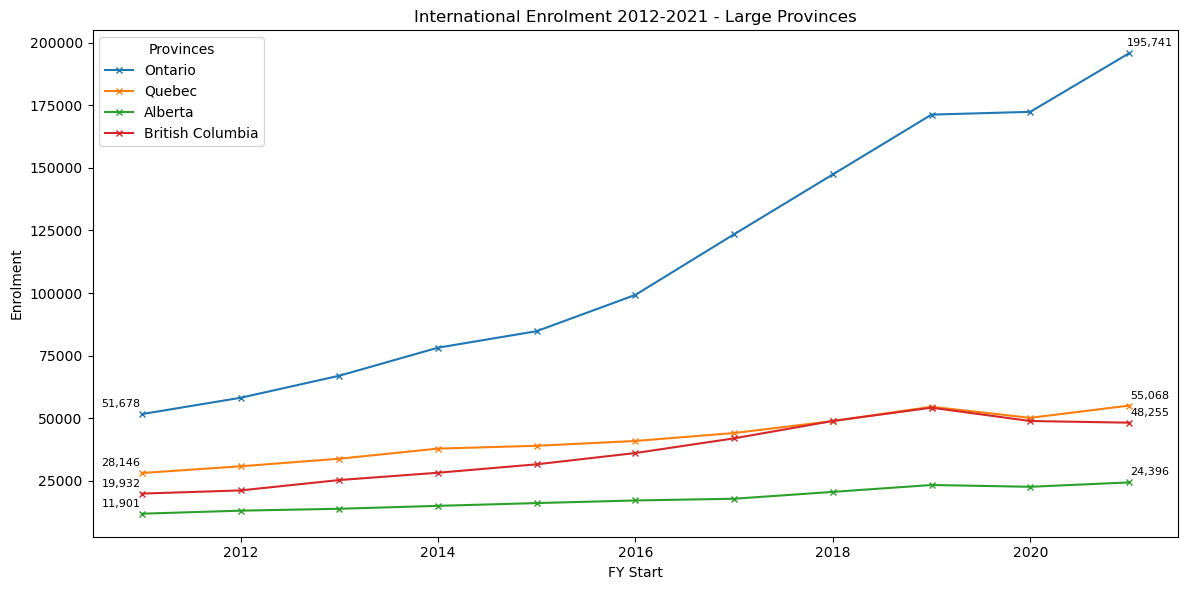

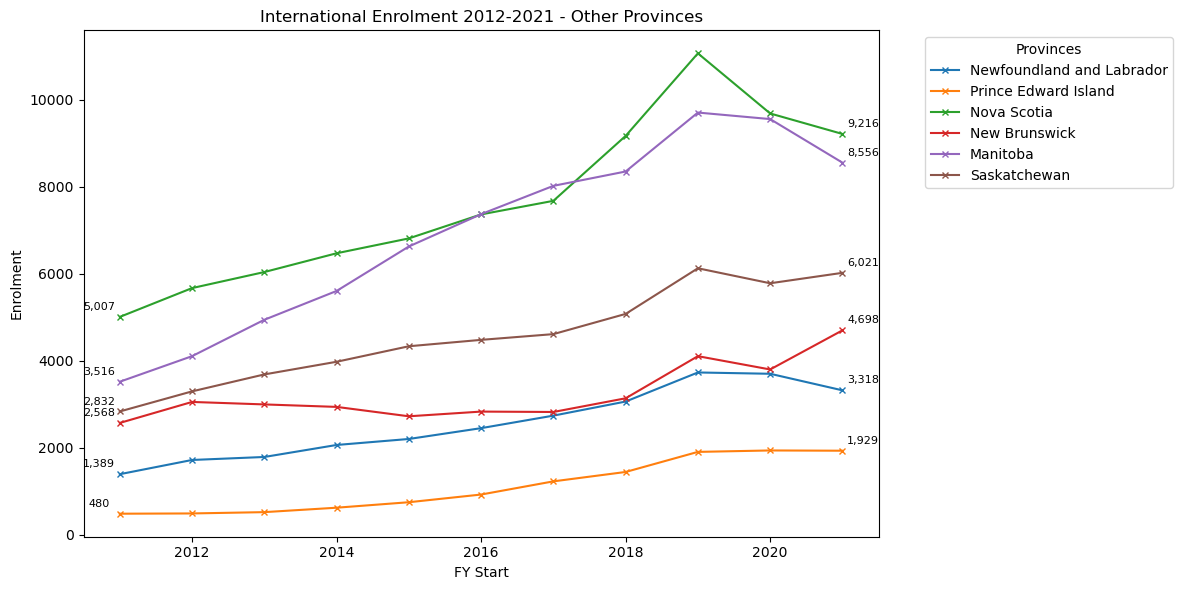

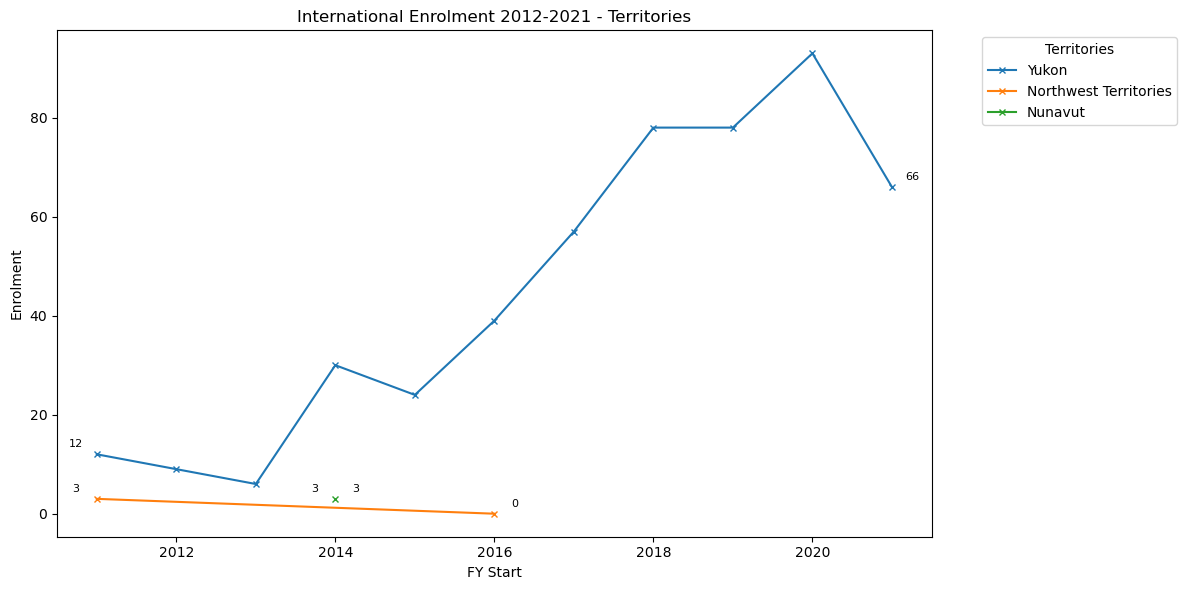

In [445]:
# Filter out rows where 'School/Locality' is "Canada"
provinces_df_intl = canada_df_intl[~canada_df_intl['School/Locality'].isin(["Canada"])]

# Define the provinces and territories for the three separate graphs
large_population_provinces = ["Ontario", "Quebec", "Alberta", "British Columbia"]
territories = ["Yukon", "Northwest Territories", "Nunavut"]
other_provinces = [
    province for province in provinces_df_intl['School/Locality'].unique()
    if province not in large_population_provinces and province not in territories
]

# Function to annotate the first and last y-values
def annotate_first_and_last_points(ax, x_data, y_data, label):
    if len(x_data) > 0 and len(y_data) > 0:
        # Annotate the first point (Fiscal Year 2011)
        ax.annotate(f'{y_data.iloc[0]:,.0f}', (x_data.iloc[0], y_data.iloc[0]),
                    textcoords="offset points", xytext=(-15, 5), ha='center', fontsize=8)
        
        # Annotate the last point (Fiscal Year 2021)
        ax.annotate(f'{y_data.iloc[-1]:,.0f}', (x_data.iloc[-1], y_data.iloc[-1]),
                    textcoords="offset points", xytext=(15, 5), ha='center', fontsize=8)

# Create the first graph for large population provinces
fig, ax = plt.subplots(figsize=(12, 6))
for province in large_population_provinces:
    province_data = provinces_df_intl[provinces_df_intl['School/Locality'] == province]
    ax.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, province_data['FY Start'], province_data['Enrolment'], province)
ax.set_title('International Enrolment 2012-2021 - Large Provinces')
ax.set_xlabel('FY Start')
ax.set_ylabel('Enrolment')
ax.legend(title='Provinces')
plt.tight_layout()
plt.show()

# Create the second graph for other provinces
fig, ax = plt.subplots(figsize=(12, 6))
for province in other_provinces:
    province_data = provinces_df_intl[provinces_df_intl['School/Locality'] == province]
    ax.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, province_data['FY Start'], province_data['Enrolment'], province)
ax.set_title('International Enrolment 2012-2021 - Other Provinces')
ax.set_xlabel('FY Start')
ax.set_ylabel('Enrolment')
ax.legend(title='Provinces', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create the third graph for territories
fig, ax = plt.subplots(figsize=(12, 6))
for territory in territories:
    territory_data = provinces_df_intl[provinces_df_intl['School/Locality'] == territory]
    ax.plot(
        territory_data['FY Start'],
        territory_data['Enrolment'],
        label=territory,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, territory_data['FY Start'], territory_data['Enrolment'], territory)
ax.set_title('International Enrolment 2012-2021 - Territories')
ax.set_xlabel('FY Start')
ax.set_ylabel('Enrolment')
ax.legend(title='Territories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [446]:
# Split 'School/Locality' by ", " from the right and extract school name and province/territory
colleges_universities_df_intl[['School Name', 'Province/Territory']] = colleges_universities_df_intl['School/Locality'].str.rsplit(", ", n=1, expand=True)

# Drop the original 'School/Locality' column if no longer needed
colleges_universities_df_intl.drop(columns=['School/Locality'], inplace=True)

# Display the updated dataframe
print(colleges_universities_df_intl.head())

    FY Start Registration status                  Status  Enrolment  \
22      2011   Full-time student  International students     1341.0   
23      2012   Full-time student  International students     1650.0   
24      2013   Full-time student  International students     1725.0   
25      2014   Full-time student  International students     2019.0   
26      2015   Full-time student  International students     2148.0   

                            School Name         Province/Territory  
22  Memorial University of Newfoundland  Newfoundland and Labrador  
23  Memorial University of Newfoundland  Newfoundland and Labrador  
24  Memorial University of Newfoundland  Newfoundland and Labrador  
25  Memorial University of Newfoundland  Newfoundland and Labrador  
26  Memorial University of Newfoundland  Newfoundland and Labrador  


In [447]:
# light cleaing - remove "of Applied Arts & Technology"ArithmeticError# Remove "of Applied Arts and Technology" from all school names
colleges_universities_df_intl['School Name'] = colleges_universities_df_intl['School Name'].str.replace(
    " of Applied Arts and Technology", "", regex=False
)

colleges_universities_df_intl['School Name'] = colleges_universities_df_intl['School Name'].str.replace(
    " Institute of Technology and Advanced Learning", "", regex=False
)

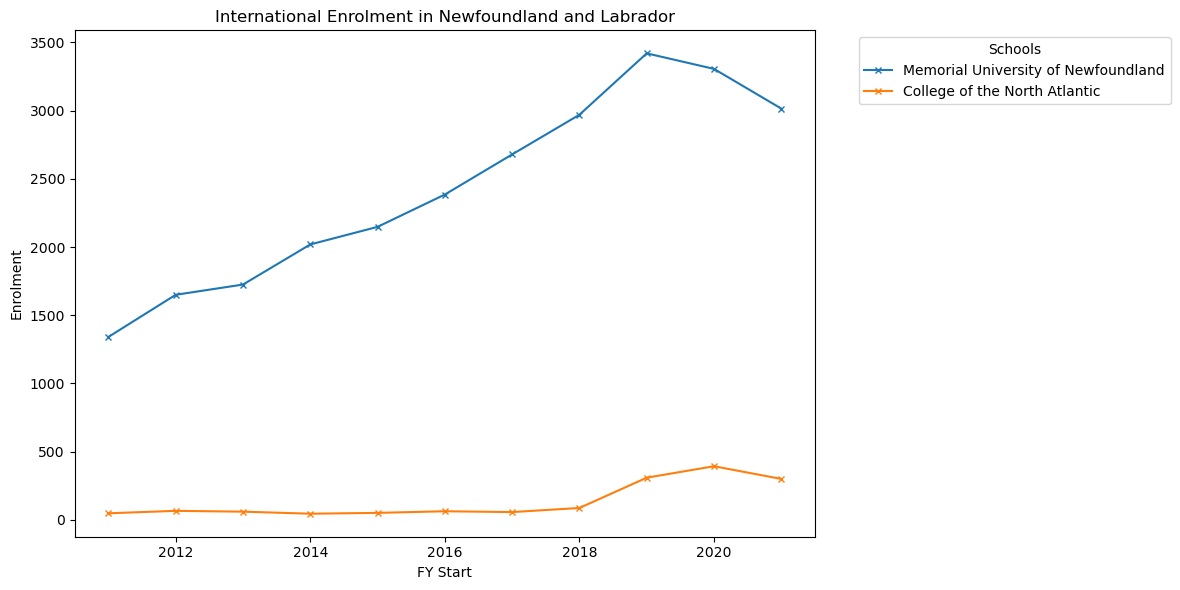

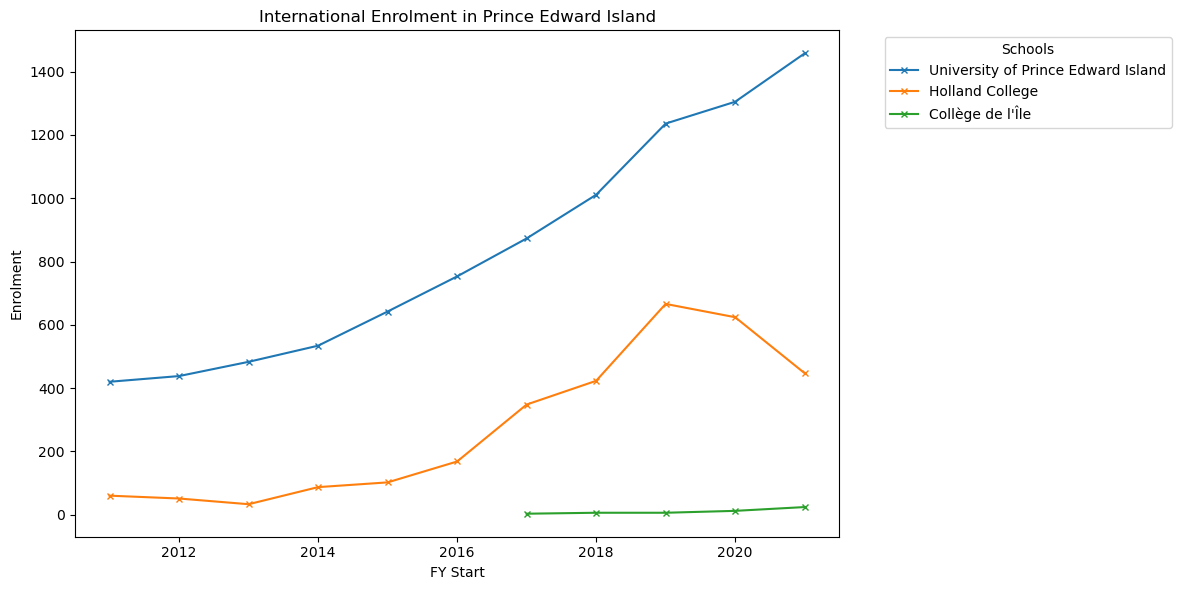

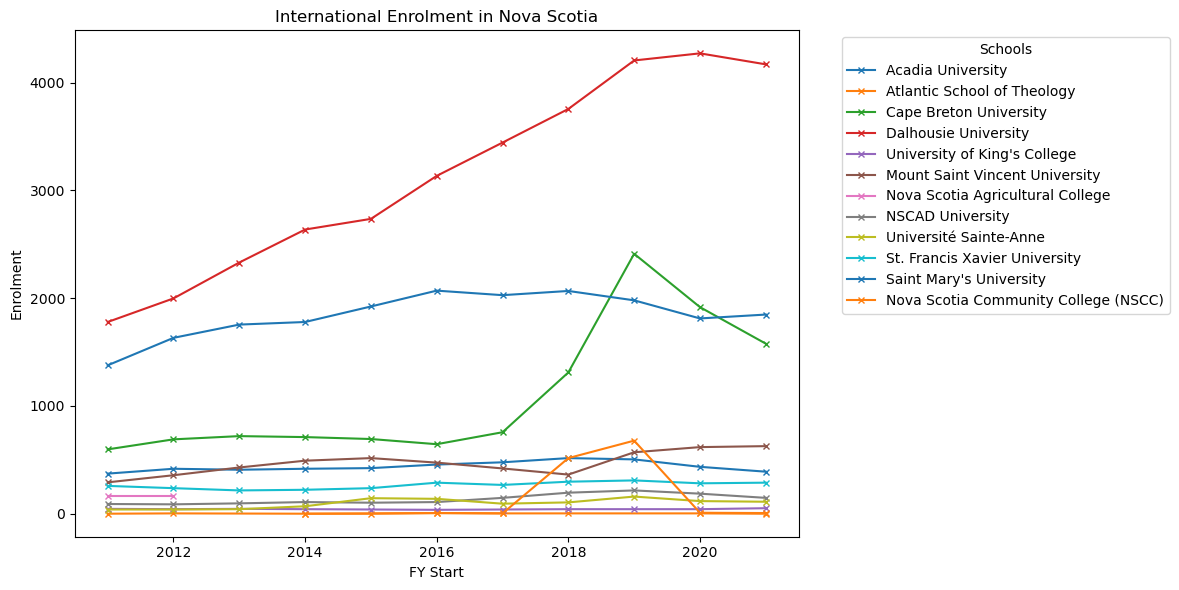

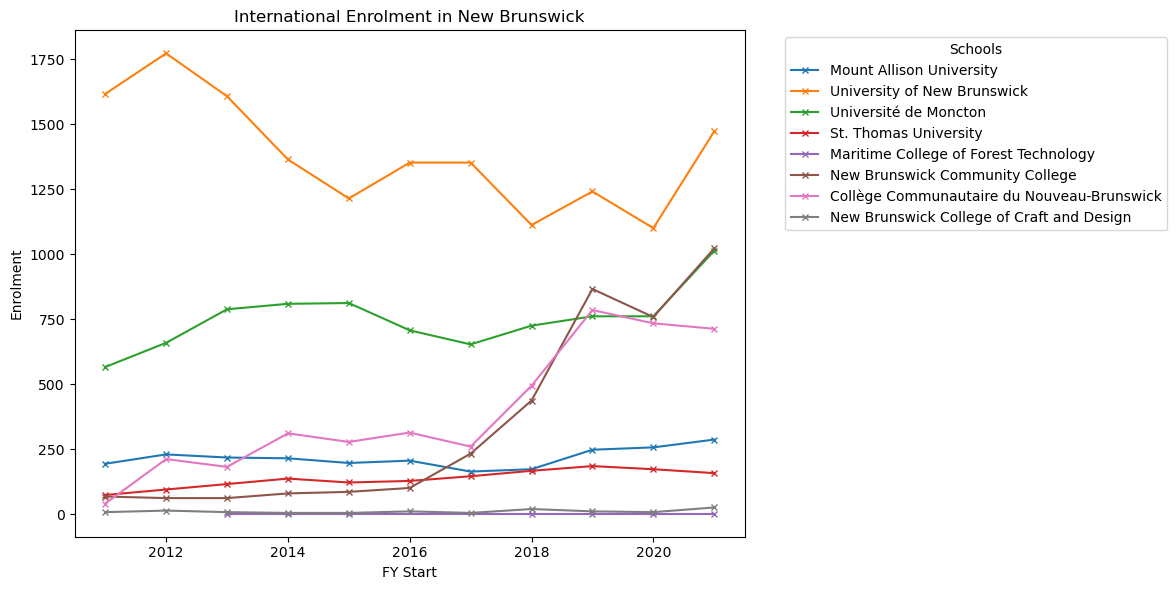

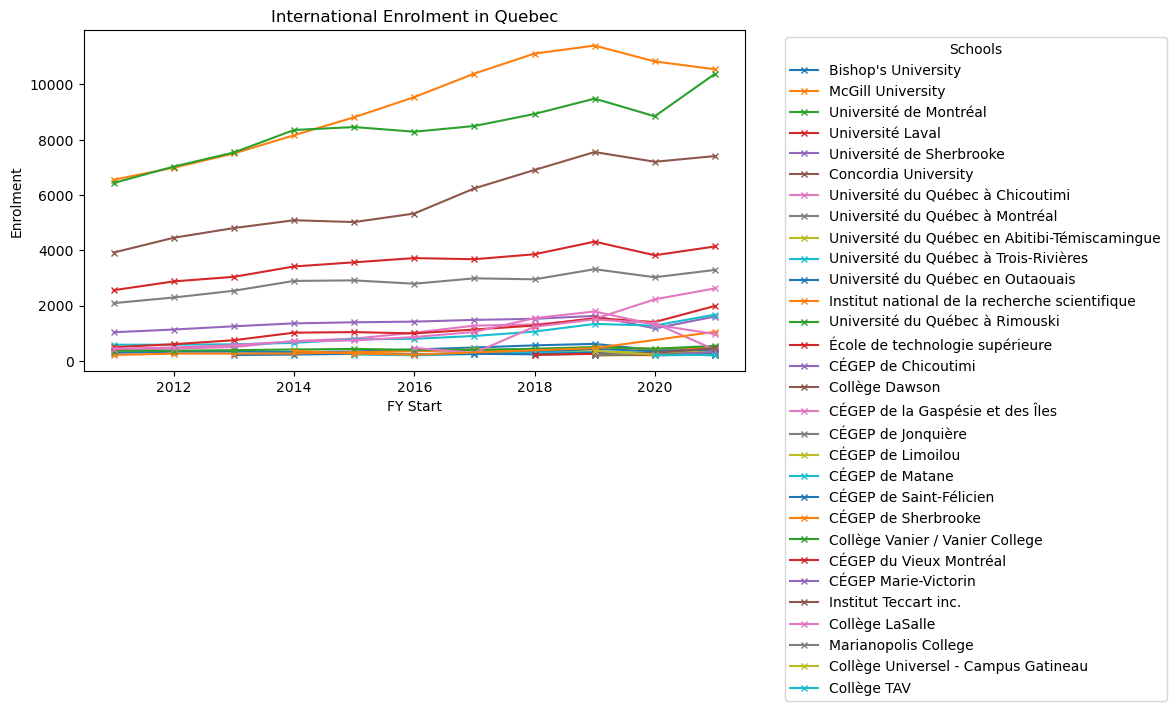

/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_38563/1225446732.py:34: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



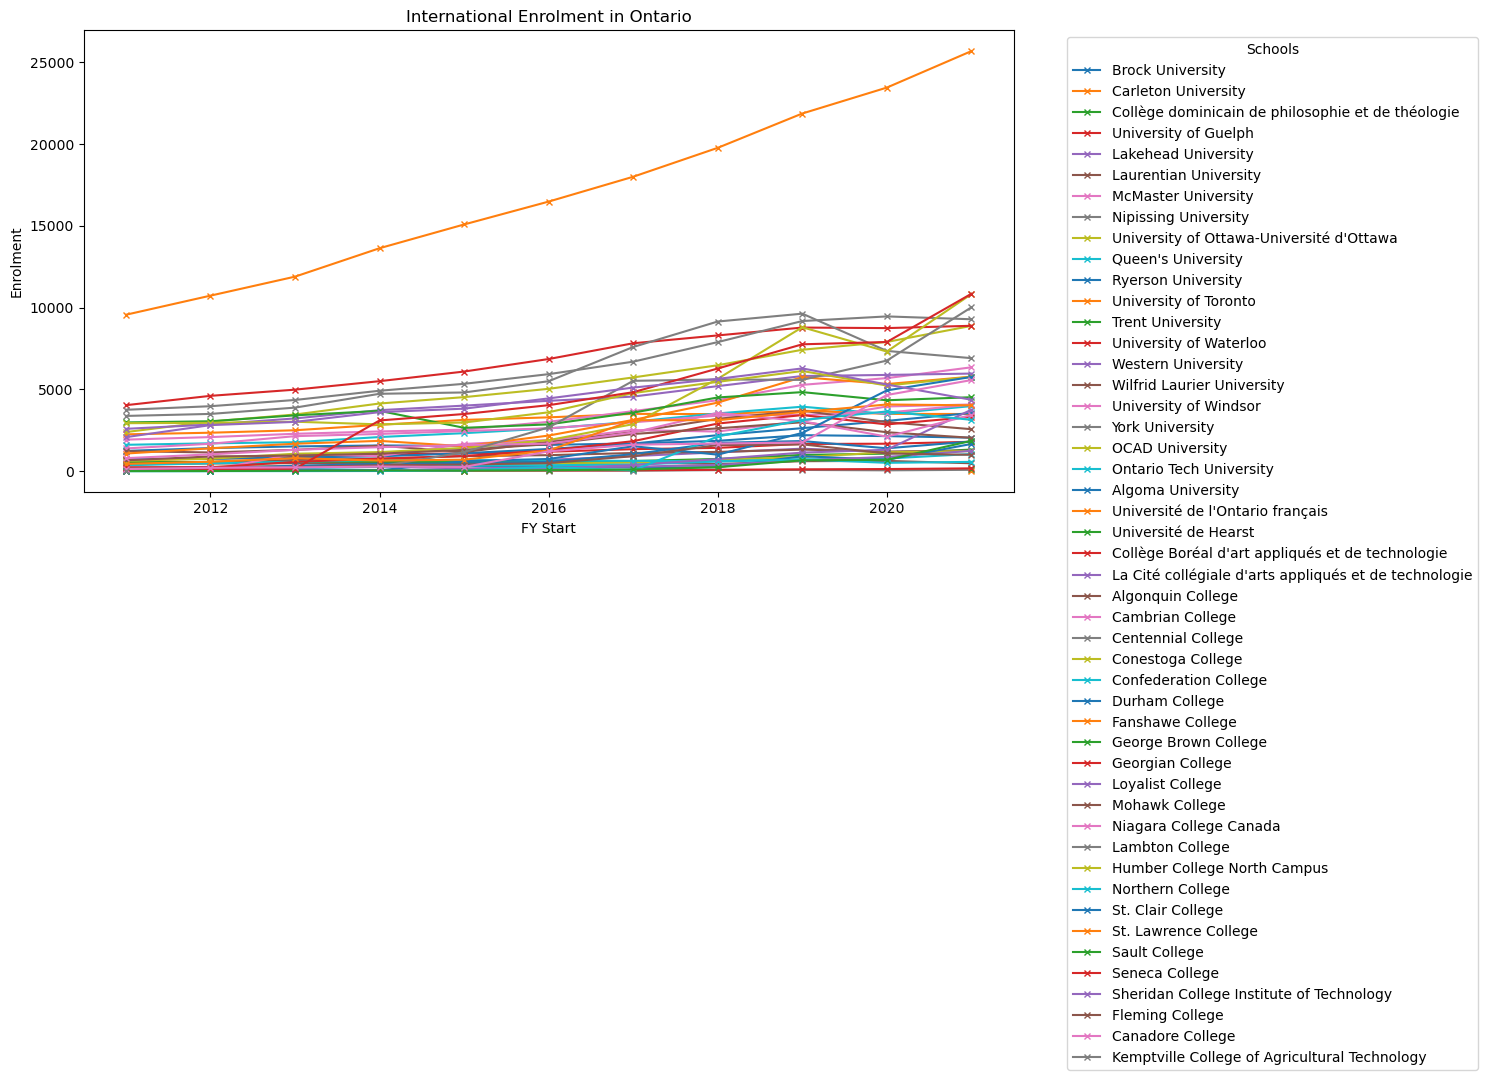

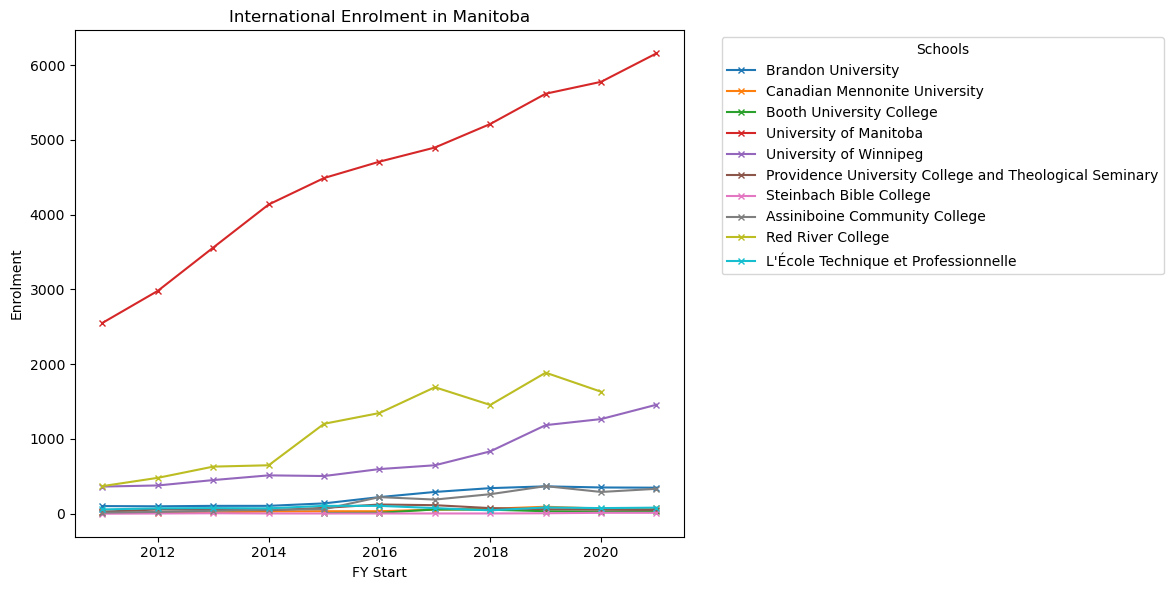

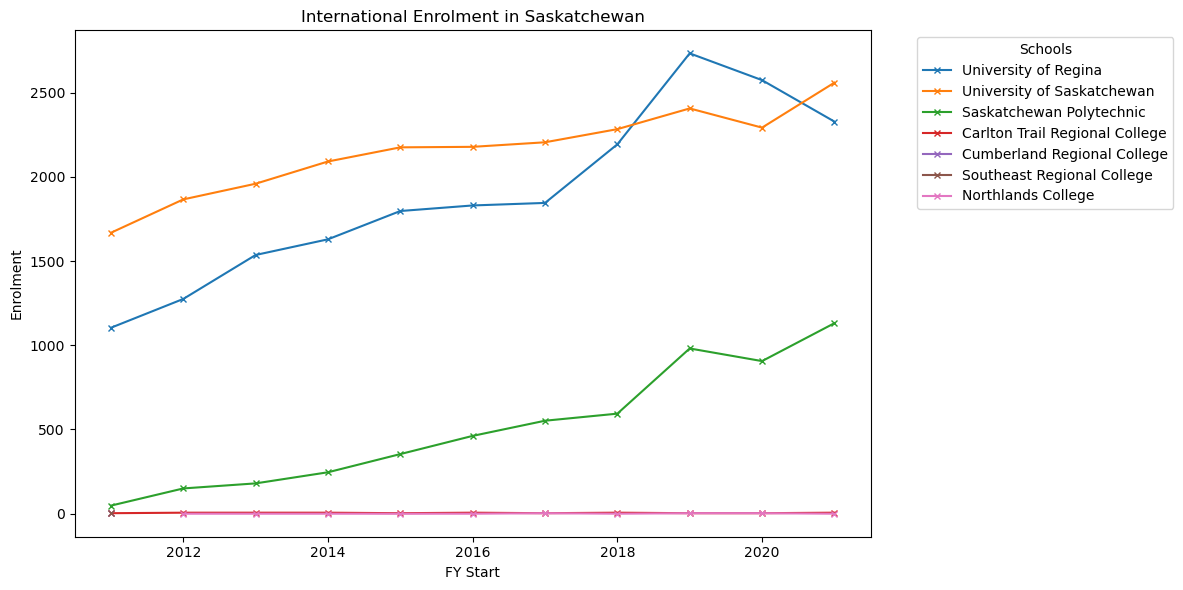

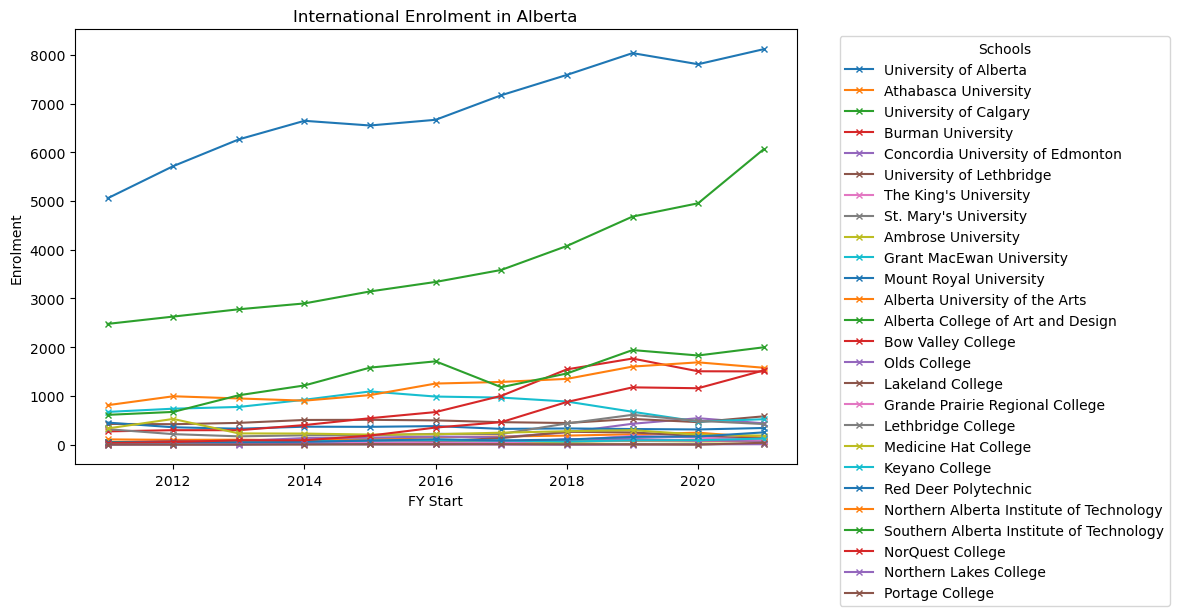

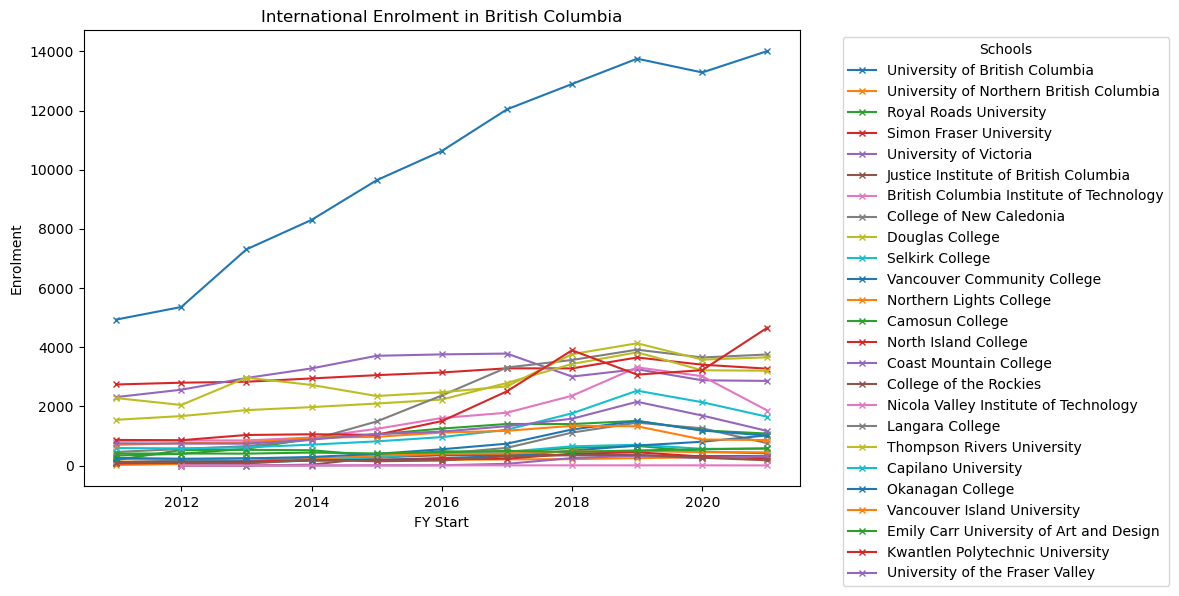

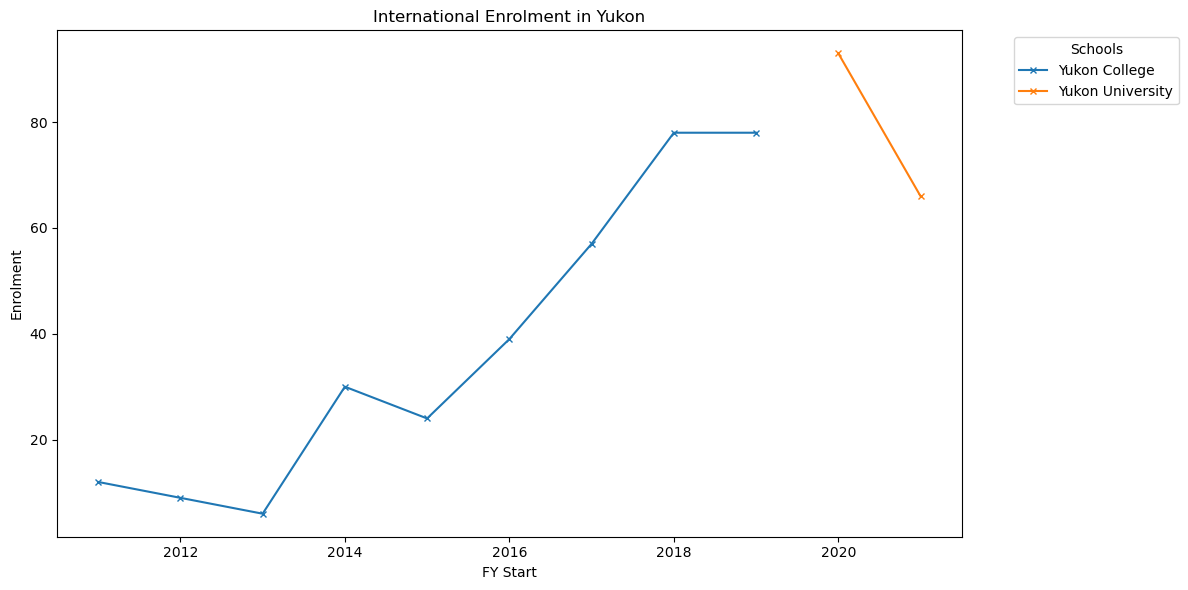

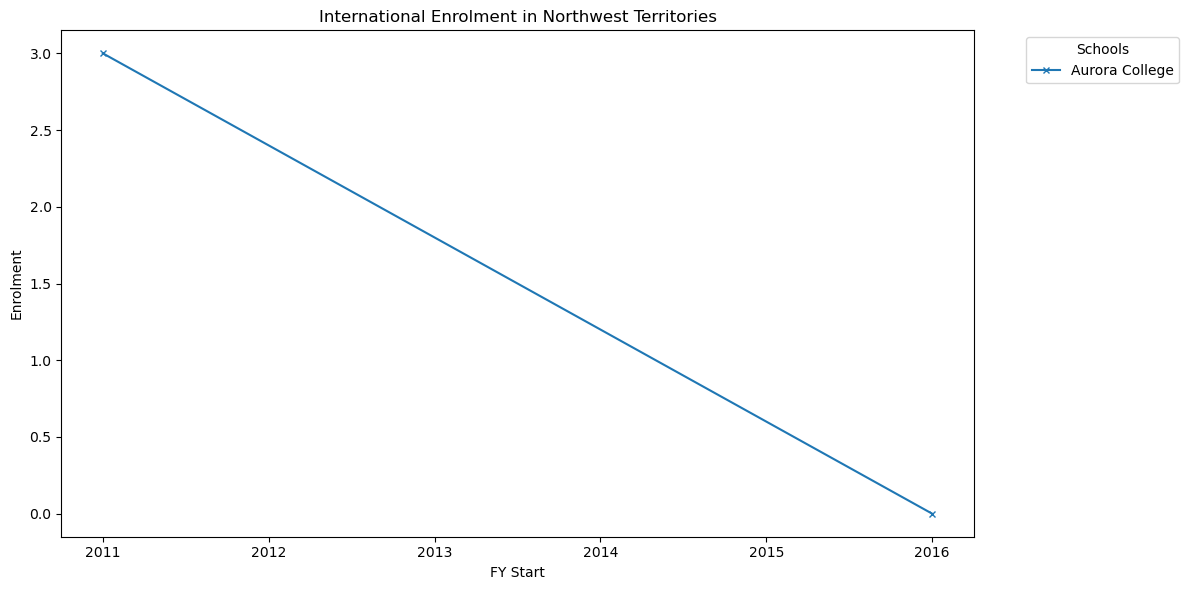

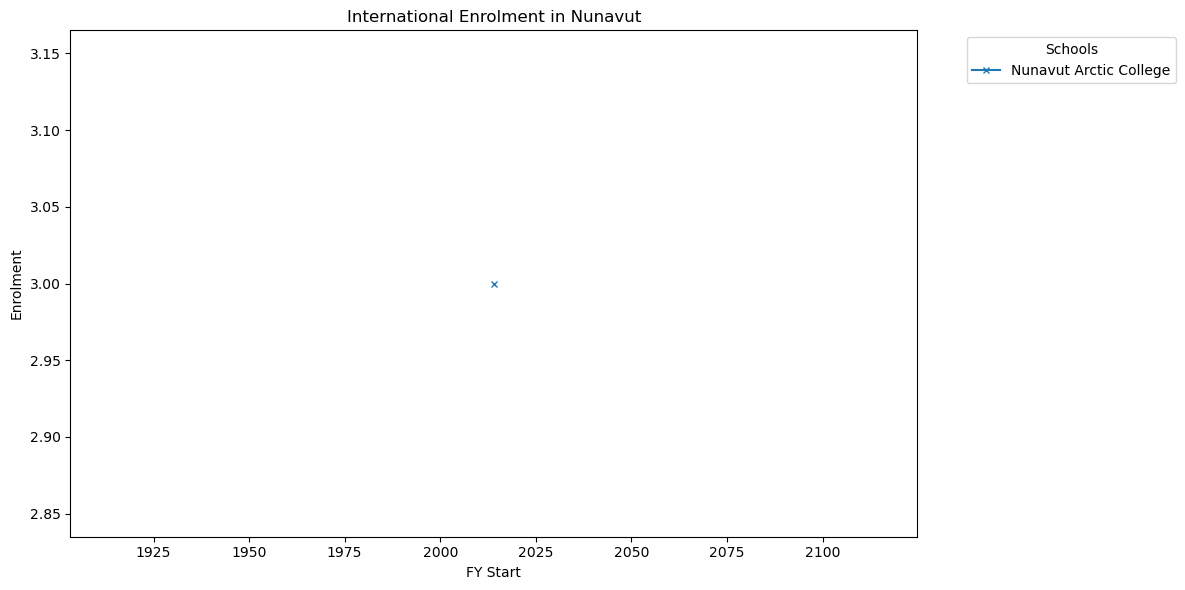

In [448]:
# Get the unique provinces/territories from the dataframe
unique_provinces_territories = colleges_universities_df_intl['Province/Territory'].unique()

# Iterate over each province/territory to create separate graphs
for province in unique_provinces_territories:
    # Filter the data for the current province/territory
    province_data = colleges_universities_df_intl[colleges_universities_df_intl['Province/Territory'] == province]

    # Apply the condition for Quebec - there are a LOT of tiny CEGEPs that make the display tough to read
    if province == "Quebec":
        province_data = province_data[province_data['Enrolment'] >= 200]

    # Create a new figure for the province
    plt.figure(figsize=(12, 6))

    # Plot enrolment trends for each school in the current province/territory
    for school in province_data['School Name'].unique():
        school_data = province_data[province_data['School Name'] == school]
        plt.plot(
            school_data['FY Start'],
            school_data['Enrolment'],
            label=school,
            marker='x',
            markersize=4
        )

    # Set the title and labels
    plt.title(f'International Enrolment in {province}')
    plt.xlabel('FY Start')
    plt.ylabel('Enrolment')

    # Display legend and layout
    plt.legend(title='Schools', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Combining Domestic and International enrolment in each province

### Pivot the tables so that every row is one institution in one year, with international and domestic enrolment, which we will then combine in one dataframe

In [449]:
colleges_universities_df.head()

FY Start Registration status             Status  Enrolment  \
22      2011   Full-time student  Canadian students    14097.0   
23      2012   Full-time student  Canadian students    13923.0   
24      2013   Full-time student  Canadian students    13611.0   
25      2014   Full-time student  Canadian students    12996.0   
26      2015   Full-time student  Canadian students    12795.0   

                            School Name         Province/Territory  
22  Memorial University of Newfoundland  Newfoundland and Labrador  
23  Memorial University of Newfoundland  Newfoundland and Labrador  
24  Memorial University of Newfoundland  Newfoundland and Labrador  
25  Memorial University of Newfoundland  Newfoundland and Labrador  
26  Memorial University of Newfoundland  Newfoundland and Labrador

In [450]:
colleges_universities_df_intl.head()

FY Start Registration status                  Status  Enrolment  \
22      2011   Full-time student  International students     1341.0   
23      2012   Full-time student  International students     1650.0   
24      2013   Full-time student  International students     1725.0   
25      2014   Full-time student  International students     2019.0   
26      2015   Full-time student  International students     2148.0   

                            School Name         Province/Territory  
22  Memorial University of Newfoundland  Newfoundland and Labrador  
23  Memorial University of Newfoundland  Newfoundland and Labrador  
24  Memorial University of Newfoundland  Newfoundland and Labrador  
25  Memorial University of Newfoundland  Newfoundland and Labrador  
26  Memorial University of Newfoundland  Newfoundland and Labrador

Because of the very small numbers involved, I will ignore the territories of Nunavut, Yukon and Northwest Territory

In [451]:
# List of territories to exclude
territories = ["Yukon", "Northwest Territories", "Nunavut"]

# Step 1: Filter out territories from colleges_universities_df and include 'Province/Territory' in the index
domestic_df = colleges_universities_df[
    (colleges_universities_df['Status'] == 'Canadian students') &
    (~colleges_universities_df['Province/Territory'].isin(territories))
].pivot_table(
    index=['School Name', 'Province/Territory', 'FY Start'],
    values='Enrolment',
    aggfunc='sum'
).reset_index()

# Rename the 'Enrolment' column to 'Domestic Enrolment'
domestic_df.rename(columns={'Enrolment': 'Domestic Enrolment'}, inplace=True)

# Step 2: Filter out territories from colleges_universities_df_intl and include 'Province/Territory' in the index
international_df = colleges_universities_df_intl[
    (colleges_universities_df_intl['Status'] == 'International students') &
    (~colleges_universities_df_intl['Province/Territory'].isin(territories))
].pivot_table(
    index=['School Name', 'Province/Territory', 'FY Start'],
    values='Enrolment',
    aggfunc='sum'
).reset_index()

# Rename the 'Enrolment' column to 'International Enrolment'
international_df.rename(columns={'Enrolment': 'International Enrolment'}, inplace=True)

# Step 3: Join the two DataFrames on 'School Name', 'Province/Territory', and 'FY Start'
combined_df = pd.merge(
    domestic_df,
    international_df,
    on=['School Name', 'Province/Territory', 'FY Start'],
    how='outer'
)

# Fill any NaN values with 0, as some institutions might not have data for both domestic and international enrolments
combined_df.fillna(0, inplace=True)

# Display the combined DataFrame
print(combined_df)


                    School Name Province/Territory  FY Start  \
0             Acadia University        Nova Scotia      2011   
1             Acadia University        Nova Scotia      2012   
2             Acadia University        Nova Scotia      2013   
3             Acadia University        Nova Scotia      2014   
4             Acadia University        Nova Scotia      2015   
...                         ...                ...       ...   
2557  École nationale de Cirque             Quebec      2017   
2558  École nationale de Cirque             Quebec      2018   
2559  École nationale de Cirque             Quebec      2019   
2560  École nationale de Cirque             Quebec      2020   
2561  École nationale de Cirque             Quebec      2021   

      Domestic Enrolment  International Enrolment  
0                 2976.0                    372.0  
1                 3135.0                    417.0  
2                 3288.0                    408.0  
3                 3240.

In [452]:
combined_df

School Name Province/Territory  FY Start  \
0             Acadia University        Nova Scotia      2011   
1             Acadia University        Nova Scotia      2012   
2             Acadia University        Nova Scotia      2013   
3             Acadia University        Nova Scotia      2014   
4             Acadia University        Nova Scotia      2015   
...                         ...                ...       ...   
2557  École nationale de Cirque             Quebec      2017   
2558  École nationale de Cirque             Quebec      2018   
2559  École nationale de Cirque             Quebec      2019   
2560  École nationale de Cirque             Quebec      2020   
2561  École nationale de Cirque             Quebec      2021   

      Domestic Enrolment  International Enrolment  
0                 2976.0                    372.0  
1                 3135.0                    417.0  
2                 3288.0                    408.0  
3                 3240.0                    417.0  
4                 3030.0                    423.0  
...                  ...                      ...  
2557                57.0                     51.0  
2558                42.0                     54.0  
2559                69.0                     60.0  
2560                63.0                     51.0  
2561                45.0                     54.0  

[2562 rows x 5 columns]

Add the Francophone tag - 1 represents that the main language of instruction is French.

In [453]:
# List of strings that indicate the school is Francophone
francophone_schools = [
    "Université Sainte-Anne", "Collège Boréal", "Collège d'Alfred", 
    "Collège dominicain", "La Cité collégiale", "Université de Hearst", 
    "Université de l'Ontario français", "Université de Moncton", 
    "Collège Communautaire du Nouveau-Brunswick", "Collège de l'Île", "L'École Technique et Professionnelle"
]

# Create the "Francophone" column with 0 as the default value
combined_df['Francophone'] = 0

# Update the "Francophone" column based on the School Name
combined_df['Francophone'] = combined_df.apply(
    lambda row: 1 if (
        any(francophone in row['School Name'] for francophone in francophone_schools) or 
        (row['Province/Territory'] == "Quebec" and "McGill University" not in row['School Name'])
    ) else 0,
    axis=1
)

# Display the updated DataFrame
print(combined_df[['School Name', 'Province/Territory', 'Francophone']].head())


         School Name Province/Territory  Francophone
0  Acadia University        Nova Scotia            0
1  Acadia University        Nova Scotia            0
2  Acadia University        Nova Scotia            0
3  Acadia University        Nova Scotia            0
4  Acadia University        Nova Scotia            0


We now have every institution in every FY from 2011- to 2021- with their domestic and international enrolment side by side

In [454]:
# create a domestic/international ratio column
combined_df['% International'] = (combined_df['International Enrolment'] / (combined_df['Domestic Enrolment'] + combined_df['International Enrolment'])) * 100

In [455]:
combined_df['% International'].sort_values(ascending=False)

105     100.000000
1412     84.695431
1687     81.392236
556      80.000000
1686     78.923427
           ...    
637       0.000000
1712      0.000000
18             NaN
19             NaN
20             NaN
Name: % International, Length: 2562, dtype: float64

In order to plot the provincial behaviour as a total and an average, we will create 2 new record rows for every province and every FY. One that average the figures for every province in every year and one that sums them up.

We will also need to do this to distinguish Francophone schools from others in the eastern provinces like ON, NB, PEI and NS. We have assumed all of QC, except McGill University is primarily Francophone

In [456]:
import pandas as pd

# Mapping of full province names to their codes - easier to read
province_codes = {
    "British Columbia": "BC",
    "Alberta": "AB",
    "Ontario": "ON",
    "Prince Edward Island": "PEI",
    "New Brunswick": "NB",
    "Nova Scotia": "NS",
    "Saskatchewan": "SK",
    "Manitoba": "MB",
    "Quebec": "QC",
    "Newfoundland and Labrador": "NL"
}

# Make a copy of the existing combined_df to add new records
new_records = []

# Get unique provinces and fiscal years - all ten provinces from 2011 to 2021
provinces = combined_df['Province/Territory'].unique()
fiscal_years = combined_df['FY Start'].unique()

# Iterate over each province and fiscal year to calculate totals and averages for Francophone and English PSIs
for province in provinces:
    for fy in fiscal_years:
        # Filter the data for the current province and fiscal year
        province_data = combined_df[
            (combined_df['Province/Territory'] == province) & (combined_df['FY Start'] == fy)
        ]

        # Split the data into Francophone and non-Francophone
        fr_data = province_data[province_data['Francophone'] == 1]
        en_data = province_data[province_data['Francophone'] == 0]

        # Calculate total and average values for English institutions
        en_domestic_total = en_data['Domestic Enrolment'].sum()
        en_intl_total = en_data['International Enrolment'].sum()
        en_intl_pct_total = (en_intl_total / (en_intl_total + en_domestic_total) * 100) if (en_intl_total + en_domestic_total) > 0 else 0

        # Only proceed with Francophone statistics if there are Francophone institutions in the data
        if not fr_data.empty:
            # Calculate total values for Francophone institutions
            fr_domestic_total = fr_data['Domestic Enrolment'].sum()
            fr_intl_total = fr_data['International Enrolment'].sum()
            fr_intl_pct_total = (fr_intl_total / (fr_intl_total + fr_domestic_total) * 100) if (fr_intl_total + fr_domestic_total) > 0 else 0

            # Get province code
            province_code = province_codes.get(province, province)  # Default to full name if not found

            # Create School Name entries using province codes for Francophone
            fr_total = f"{province_code} FR Total"

            # Append Francophone total record
            new_records.append({
                'School Name': fr_total,
                'Province/Territory': province,
                'FY Start': fy,
                'Domestic Enrolment': fr_domestic_total,
                'International Enrolment': fr_intl_total,
                '% International': fr_intl_pct_total,
                'Francophone': 1  # Tag as Francophone
            })

        # Get the province code from the dictionary
        province_code = province_codes.get(province, province)  # Default to full name if not found

        # Create School Name entries for the provinces using province codes for English
        en_total = f"{province_code} Total"

        # Append English total record
        new_records.append({
            'School Name': en_total,
            'Province/Territory': province,
            'FY Start': fy,
            'Domestic Enrolment': en_domestic_total,
            'International Enrolment': en_intl_total,
            '% International': en_intl_pct_total,
            'Francophone': 0  # Tag as non-Francophone
        })

# Convert new records to a DataFrame
new_records_df = pd.DataFrame(new_records)

# Append the new records to the original DataFrame
combined_df = pd.concat([combined_df, new_records_df], ignore_index=True)

# Display the updated DataFrame
print(combined_df)


            School Name    Province/Territory  FY Start  Domestic Enrolment  \
0     Acadia University           Nova Scotia      2011              2976.0   
1     Acadia University           Nova Scotia      2012              3135.0   
2     Acadia University           Nova Scotia      2013              3288.0   
3     Acadia University           Nova Scotia      2014              3240.0   
4     Acadia University           Nova Scotia      2015              3030.0   
...                 ...                   ...       ...                 ...   
2727          PEI Total  Prince Edward Island      2019              5379.0   
2728       PEI FR Total  Prince Edward Island      2020                 9.0   
2729          PEI Total  Prince Edward Island      2020              5433.0   
2730       PEI FR Total  Prince Edward Island      2021                 6.0   
2731          PEI Total  Prince Edward Island      2021              5022.0   

      International Enrolment  Francophone  % Inter

In [457]:
combined_df

School Name    Province/Territory  FY Start  Domestic Enrolment  \
0     Acadia University           Nova Scotia      2011              2976.0   
1     Acadia University           Nova Scotia      2012              3135.0   
2     Acadia University           Nova Scotia      2013              3288.0   
3     Acadia University           Nova Scotia      2014              3240.0   
4     Acadia University           Nova Scotia      2015              3030.0   
...                 ...                   ...       ...                 ...   
2727          PEI Total  Prince Edward Island      2019              5379.0   
2728       PEI FR Total  Prince Edward Island      2020                 9.0   
2729          PEI Total  Prince Edward Island      2020              5433.0   
2730       PEI FR Total  Prince Edward Island      2021                 6.0   
2731          PEI Total  Prince Edward Island      2021              5022.0   

      International Enrolment  Francophone  % International  
0                       372.0            0        11.111111  
1                       417.0            0        11.739865  
2                       408.0            0        11.038961  
3                       417.0            0        11.402789  
4                       423.0            0        12.250217  
...                       ...          ...              ...  
2727                   1902.0            0        26.122785  
2728                     12.0            1        57.142857  
2729                   1929.0            0        26.202119  
2730                     24.0            1        80.000000  
2731                   1905.0            0        27.501083  

[2732 rows x 7 columns]

In [458]:
combined_df[combined_df['Province/Territory'] == 'Alberta']

School Name Province/Territory  FY Start  \
11    Alberta College of Art and Design            Alberta      2011   
12    Alberta College of Art and Design            Alberta      2012   
13    Alberta College of Art and Design            Alberta      2013   
14    Alberta College of Art and Design            Alberta      2014   
15    Alberta College of Art and Design            Alberta      2015   
...                                 ...                ...       ...   
2590                           AB Total            Alberta      2017   
2591                           AB Total            Alberta      2018   
2592                           AB Total            Alberta      2019   
2593                           AB Total            Alberta      2020   
2594                           AB Total            Alberta      2021   

      Domestic Enrolment  International Enrolment  Francophone  \
11                1107.0                     54.0            0   
12                1062.0                     51.0            0   
13                1044.0                     57.0            0   
14                1020.0                     63.0            0   
15                1050.0                     69.0            0   
...                  ...                      ...          ...   
2590            147558.0                  17880.0            0   
2591            150189.0                  20622.0            0   
2592            151959.0                  23364.0            0   
2593            153111.0                  22641.0            0   
2594            154866.0                  24393.0            0   

      % International  
11           4.651163  
12           4.582210  
13           5.177112  
14           5.817175  
15           6.166220  
...               ...  
2590        10.807674  
2591        12.072993  
2592        13.326261  
2593        12.882357  
2594        13.607685  

[289 rows x 7 columns]

In [459]:
# cast the column dtypes - Domestic enrolment as int, International enrolment as int, % Int'l as float to 3dp
combined_df['Domestic Enrolment'] = combined_df['Domestic Enrolment'].astype(int)
combined_df['International Enrolment'] = combined_df['International Enrolment'].astype(int)
combined_df['% International'] = combined_df['% International'].round(2)

In [460]:
combined_df.tail(10)

School Name    Province/Territory  FY Start  Domestic Enrolment  \
2722  PEI FR Total  Prince Edward Island      2017                  18   
2723     PEI Total  Prince Edward Island      2017                5583   
2724  PEI FR Total  Prince Edward Island      2018                  15   
2725     PEI Total  Prince Edward Island      2018                5031   
2726  PEI FR Total  Prince Edward Island      2019                  18   
2727     PEI Total  Prince Edward Island      2019                5379   
2728  PEI FR Total  Prince Edward Island      2020                   9   
2729     PEI Total  Prince Edward Island      2020                5433   
2730  PEI FR Total  Prince Edward Island      2021                   6   
2731     PEI Total  Prince Edward Island      2021                5022   

      International Enrolment  Francophone  % International  
2722                        3            1            14.29  
2723                     1221            0            17.95  
2724                        6            1            28.57  
2725                     1434            0            22.18  
2726                        6            1            25.00  
2727                     1902            0            26.12  
2728                       12            1            57.14  
2729                     1929            0            26.20  
2730                       24            1            80.00  
2731                     1905            0            27.50

In [461]:
# spot check - Prince Edward Island in 2019
combined_df[
    (combined_df['Province/Territory'] == 'Prince Edward Island') &
    (combined_df['FY Start'] == 2019)
]

School Name    Province/Territory  FY Start  \
554                     Collège de l'Île  Prince Edward Island      2019   
1275                     Holland College  Prince Edward Island      2019   
2238  University of Prince Edward Island  Prince Edward Island      2019   
2726                        PEI FR Total  Prince Edward Island      2019   
2727                           PEI Total  Prince Edward Island      2019   

      Domestic Enrolment  International Enrolment  Francophone  \
554                   18                        6            1   
1275                2385                      666            0   
2238                2994                     1236            0   
2726                  18                        6            1   
2727                5379                     1902            0   

      % International  
554             25.00  
1275            21.83  
2238            29.22  
2726            25.00  
2727            26.12

From the above you can see the % International is the same in both the average and the total columns which should be the case.


In [462]:
# spot check - Nova Scotia in 2019
combined_df[
    (combined_df['Province/Territory'] == 'Nova Scotia') &
    (combined_df['FY Start'] == 2019)
].head(10)

School Name Province/Territory  FY Start  \
8                        Acadia University        Nova Scotia      2019   
88             Atlantic School of Theology        Nova Scotia      2019   
230                 Cape Breton University        Nova Scotia      2019   
1154                  Dalhousie University        Nova Scotia      2019   
1575        Mount Saint Vincent University        Nova Scotia      2019   
1586                      NSCAD University        Nova Scotia      2019   
1743  Nova Scotia Community College (NSCC)        Nova Scotia      2019   
1897               Saint Mary's University        Nova Scotia      2019   
2007         St. Francis Xavier University        Nova Scotia      2019   
2172          University of King's College        Nova Scotia      2019   

      Domestic Enrolment  International Enrolment  Francophone  \
8                   3039                      504            0   
88                    30                        0            0   
230                 1479                     2412            0   
1154               12504                     4206            0   
1575                1866                      570            0   
1586                 531                      216            0   
1743                7377                      678            0   
1897                3744                     1980            0   
2007                3753                      309            0   
2172                 798                       42            0   

      % International  
8               14.23  
88               0.00  
230             61.99  
1154            25.17  
1575            23.40  
1586            28.92  
1743             8.42  
1897            34.59  
2007             7.61  
2172             5.00

In [499]:
# show every school in canada by % international students in 2019 and 2021
all_intl_percent = combined_df[
    (combined_df['FY Start'].isin([2019, 2021])) &
    (combined_df['Francophone'] == 0)
][['School Name', 'Province/Territory', 'FY Start', 'Domestic Enrolment', 'International Enrolment', '% International']].sort_values(by='% International', ascending=False)

all_intl_percent.head(40)

School Name Province/Territory  FY Start  \
1412                  Lambton College            Ontario      2021   
1686                 Northern College            Ontario      2019   
1688                 Northern College            Ontario      2021   
221                  Canadore College            Ontario      2021   
1410                  Lambton College            Ontario      2019   
1456                 Loyalist College            Ontario      2021   
35                  Algoma University            Ontario      2021   
230            Cape Breton University        Nova Scotia      2019   
177                  Cambrian College            Ontario      2021   
1921                    Sault College            Ontario      2021   
33                  Algoma University            Ontario      2019   
307          College of New Caledonia   British Columbia      2019   
623                 Conestoga College            Ontario      2021   
298            Coast Mountain College   British Columbia      2021   
1710          Northern Lights College   British Columbia      2021   
1708          Northern Lights College   British Columbia      2019   
175                  Cambrian College            Ontario      2019   
274                Centennial College            Ontario      2019   
2462      Vancouver Community College   British Columbia      2021   
621                 Conestoga College            Ontario      2019   
232            Cape Breton University        Nova Scotia      2021   
2020             St. Lawrence College            Ontario      2021   
1423                  Langara College   British Columbia      2021   
1998                St. Clair College            Ontario      2021   
296            Coast Mountain College   British Columbia      2019   
1421                  Langara College   British Columbia      2019   
1875           Royal Roads University   British Columbia      2019   
1943                   Seneca College            Ontario      2021   
1930                  Selkirk College   British Columbia      2019   
1357  Kwantlen Polytechnic University   British Columbia      2021   
276                Centennial College            Ontario      2021   
241               Capilano University   British Columbia      2019   
2084       Thompson Rivers University   British Columbia      2019   
2018             St. Lawrence College            Ontario      2019   
1932                  Selkirk College   British Columbia      2021   
2460      Vancouver Community College   British Columbia      2019   
1621           Niagara College Canada            Ontario      2021   
309          College of New Caledonia   British Columbia      2021   
2086       Thompson Rivers University   British Columbia      2021   
219                  Canadore College            Ontario      2019   

      Domestic Enrolment  International Enrolment  % International  
1412                1809                    10011            84.70  
1686                 834                     3123            78.92  
1688                 990                     3138            76.02  
221                 1878                     5565            74.77  
1410                2112                     5577            72.53  
1456                1668                     3753            69.23  
35                   780                     1662            68.06  
230                 1479                     2412            61.99  
177                 2853                     4074            58.81  
1921                1326                     1851            58.26  
33                   699                      912            56.61  
307                 1116                     1452            56.54  
623                 8391                    10821            56.32  
298                  243                      312            56.22  
1710                 360                      450            55.56  
1708                 444                      495  

In [ ]:
# export all_intl_percent to a CSV
# all_intl_percent.to_csv('all_intl_percent.csv', index=False)

## Province-level changes to enrolment from 2011-2021

Instead of Matplotlib which is static and would require a lot of tedious coding to separate groups from one another, **Plotly** is an interactive tool/module that lets us flexibly toggle lines on and off. We'll use this moving forward.

In [463]:
import plotly.graph_objects as go

# Define a consistent color palette for provinces
color_palette = {
    "BC": "blue", "AB": "green", "ON": "red", "PEI": "purple",
    "NB": "orange", "NS": "brown", "SK": "pink", "MB": "cyan",
    "QC": "magenta", "NL": "black"
}

# 1. Plot for Total Domestic and International Enrolment
fig_total = go.Figure()

# Iterate over each unique province and add separate plots for English and Francophone in Quebec
for province in combined_df['Province/Territory'].unique():
    # Get the province code from the mapping
    province_code = province_codes.get(province, province)
    color = color_palette.get(province_code, "gray")

    # Filter the data for English (non-Francophone) totals
    en_total_data = combined_df[
        (combined_df['Province/Territory'] == province) &
        (combined_df['School Name'].str.contains("Total")) &
        (combined_df['Francophone'] == 0)
    ].sort_values(by='FY Start')
    
    # Plot the Domestic Enrolment for English
    fig_total.add_trace(go.Scatter(
        x=en_total_data['FY Start'],
        y=en_total_data['Domestic Enrolment'],
        mode='lines+markers',
        name=f"{province_code} Domestic",
        line=dict(dash='solid', color=color)
    ))

    # Plot the International Enrolment for English
    fig_total.add_trace(go.Scatter(
        x=en_total_data['FY Start'],
        y=en_total_data['International Enrolment'],
        mode='lines+markers',
        name=f"{province_code} International",
        line=dict(dash='dot', color=color)
    ))

    # Special handling for Quebec Francophone data only
    if province == "Quebec":
        # Filter the data for Francophone totals in Quebec
        fr_total_data = combined_df[
            (combined_df['Province/Territory'] == province) &
            (combined_df['School Name'].str.contains("FR Total")) &
            (combined_df['Francophone'] == 1)
        ].sort_values(by='FY Start')

        # Plot Francophone Domestic and International Enrolment for Quebec
        fig_total.add_trace(go.Scatter(
            x=fr_total_data['FY Start'],
            y=fr_total_data['Domestic Enrolment'],
            mode='lines+markers',
            name=f"{province_code} FR Domestic",
            line=dict(dash='solid', color=color)
        ))
        fig_total.add_trace(go.Scatter(
            x=fr_total_data['FY Start'],
            y=fr_total_data['International Enrolment'],
            mode='lines+markers',
            name=f"{province_code} FR International",
            line=dict(dash='dot', color=color)
        ))

# Set the title and labels for the total plot
fig_total.update_layout(
    title="Total Domestic and International Enrolment by Province (2011-2021)",
    xaxis_title='Fiscal Year',
    yaxis_title='Enrolment',
    legend_title='Province/Category',
    template='plotly'
)
fig_total.show()

# 2. Plot for % International
fig_ratio = go.Figure()

# Iterate over each province and add separate plots for English and Francophone percentages in Quebec
for province in combined_df['Province/Territory'].unique():
    # Get the province code from the mapping
    province_code = province_codes.get(province, province)
    color = color_palette.get(province_code, "gray")

    # Filter the data for English (non-Francophone) percentages
    en_ratio_data = combined_df[
        (combined_df['Province/Territory'] == province) &
        (combined_df['School Name'].str.contains("Total")) &  # Updated from "Average" to "Total"
        (combined_df['Francophone'] == 0)
    ].sort_values(by='FY Start')
    
    # Skip plotting if no data is available
    if en_ratio_data.empty:
        continue

    # Plot the % International for English
    fig_ratio.add_trace(go.Scatter(
        x=en_ratio_data['FY Start'],
        y=en_ratio_data['% International'],
        mode='lines+markers',
        name=f"{province_code} % International",
        line=dict(dash='solid', color=color)
    ))

    # Special handling for Quebec Francophone data only
    if province == "Quebec":
        # Filter the data for Francophone percentages in Quebec
        fr_ratio_data = combined_df[
            (combined_df['Province/Territory'] == province) &
            (combined_df['School Name'].str.contains("FR Total")) &  # Updated from "FR Average" to "FR Total"
            (combined_df['Francophone'] == 1)
        ].sort_values(by='FY Start')

        # Skip plotting if no data is available
        if fr_ratio_data.empty:
            continue

        # Plot Francophone % International for Quebec
        fig_ratio.add_trace(go.Scatter(
            x=fr_ratio_data['FY Start'],
            y=fr_ratio_data['% International'],
            mode='lines+markers',
            name=f"{province_code} FR % International",
            line=dict(dash='solid', color=color)
        ))

# Set the title and labels for the percentage plot
fig_ratio.update_layout(
    title="% International Students by Province (2011-2021)",
    xaxis_title='Fiscal Year',
    yaxis_title='% International',
    legend_title='Province/Category',
    template='plotly'
)
fig_ratio.show()


### Thoughts on initial province-by-province data:

- Domestic enrolment has flatlined or declined in most provinces with the exception of modest increases in Western Canada (SK, AB), with declines particularly in Atlantic Canada (NL, PEI and NB). Quebec Francophone is the same with a slight decline similar to Ontario domestic students.

- All the provinces have increased in international students by at least a factor of two, often three or four in Ontario's case

- Ontario's growth in international students is far greater than the other provinces even when taking population into account. They have quadrupled their number in ten years where others have doubled or made 2.5x and from a lower base.

- **Quebec FR is among the lowest international %, but the Quebec EN (only McGill University) Intl % mimics an Ontario or BC institution**. The QC French schools added international students like the BC average, but based on the size of the ecosystem it should have added more, were the Francophone system behaving like the English one. We have Ontario Francophone institutions and we can look for similar behaviour to Quebec FR to show that the Francophone ecosystem is changing at a different rate than the English one.  

- BC started the highest Intl% and remains the highest but ON has all but caught up now. Later on it would be interesting to drill down further in previous years for Ontario and BC, to see how BC's demographics have changed and if it is more distinct. I would like to drill down into the school level and see how that is changing too.

- **Because all the provinces have roughly flatlined in domestic student enrolment, I will focus most of the exploration on trends in international enrolment at the school level, e.g. some making disproportionate changes beyond the provincial average or radically changing their demography**

## Plotting enrolment changes by school against the provincial statistics

In [464]:
import plotly.graph_objects as go
import plotly.express as px

# Generate a color palette using plotly express (ensures a consistent set of colors)
palette = px.colors.qualitative.Plotly  # Use 'Plotly' color scheme
# Filter out only English schools (Francophone == 0)
english_schools_df = combined_df[combined_df['Francophone'] == 0]
unique_institutions = english_schools_df['School Name'].unique()
institution_colors = {institution: palette[i % len(palette)] for i, institution in enumerate(unique_institutions)}

# Iterate over each unique province to create separate plots
for province in english_schools_df['Province/Territory'].unique():
    # Filter the data for the current province
    province_data = english_schools_df[english_schools_df['Province/Territory'] == province]
    
    # Create a new figure for the current province
    fig = go.Figure()

    # Get unique institutions in the province
    institutions_in_province = province_data['School Name'].unique()

    # Plot each institution's Domestic and International Enrolment
    for institution in institutions_in_province:
        institution_data = province_data[province_data['School Name'] == institution].sort_values(by='FY Start')
        color = institution_colors[institution]  # Use the color from the color mapping
        
        # Add Domestic Enrolment line (solid)
        fig.add_trace(go.Scatter(
            x=institution_data['FY Start'],
            y=institution_data['Domestic Enrolment'],
            mode='lines+markers',
            name=f"{institution} Domestic",
            line=dict(color=color, dash='solid'),  # Solid line for Domestic
            marker=dict(color=color)
        ))

        # Add International Enrolment line (dotted)
        fig.add_trace(go.Scatter(
            x=institution_data['FY Start'],
            y=institution_data['International Enrolment'],
            mode='lines+markers',
            name=f"{institution} International",
            line=dict(color=color, dash='dot'),  # Dotted line for International
            marker=dict(color=color)
        ))

    # Set the title and labels for the current province
    fig.update_layout(
        title=f"Enrolment Figures for {province} (2011-2021)",
        xaxis_title='Fiscal Year',
        yaxis_title='Enrolment',
        legend_title='Institution',
        template='plotly'
    )
    
    # Show the interactive plot
    fig.show()

In [465]:
import plotly.graph_objects as go
import plotly.express as px

# Generate a color palette using plotly express (ensures a consistent set of colors)
palette = px.colors.qualitative.Plotly  # Use the 'Plotly' color scheme
# Filter out only English schools (Francophone == 0)
english_schools_df = combined_df[combined_df['Francophone'] == 0]
unique_institutions = english_schools_df['School Name'].unique()
institution_colors = {institution: palette[i % len(palette)] for i, institution in enumerate(unique_institutions)}

# Iterate over each unique province in the filtered english_schools_df
for province in english_schools_df['Province/Territory'].unique():
    # Filter the data for the current province
    province_data = english_schools_df[english_schools_df['Province/Territory'] == province]
    
    # Create a new figure for the current province
    fig = go.Figure()

    # Get unique institutions in the province, excluding any that contain "Total" in the name
    institutions_in_province = [institution for institution in province_data['School Name'].unique() if "Total" not in institution]

    # Plot the % International for each institution
    for institution in institutions_in_province:
        institution_data = province_data[province_data['School Name'] == institution].sort_values(by='FY Start')
        color = institution_colors[institution]  # Use the color from the color mapping
        
        # Add the % International line for the institution
        fig.add_trace(go.Scatter(
            x=institution_data['FY Start'],
            y=institution_data['% International'],
            mode='lines+markers',
            name=institution,
            line=dict(color=color),  # Use the consistent color
            marker=dict(color=color)
        ))

    # Set the title and labels
    fig.update_layout(
        title=f"International Student % for {province} (2011-2021)",
        xaxis_title='Fiscal Year',
        yaxis_title='% International',
        legend_title='Institution',
        template='plotly'
    )
    
    # Show the interactive plot
    fig.show()


## Analysis of the school-level (Anglophone) data

### There are 139 Anglophone schools in this data and all but six began AY 2011/2012 with less than 20% international students.


These six exception schools were spread across the country:
- In Ontario, Centennial College
- in BC, Thompson Rivers University (TRU) and Emily Carr University of Art and Design (ECUAD)
- In Quebec, McGill University
- In Nova Scotia, Saint Mary's University & Cape Breton University (CBU) 

These schools started noticeably above 20%, with two above 25%. They tended to be universities, larger schools in their respective provinces, except for ECUAD which is an arts-specific institution so it's likely subject to different student recruitment trends.

In other words, these schools already had an established international contingent when entering the period, and the schools were significant parts of their provincial postsecondary landscape already. I will call these schools **"Legacy internationals" or legacies**.

See quote below:

In [466]:
# Query - English institutions with >20% International students in 2011
combined_df[(combined_df['FY Start'] == 2011) & (combined_df['% International'] > 20) & (combined_df['Francophone'] == 0) & (~combined_df['School Name'].str.contains("Total|Average"))
][['School Name', 'FY Start', '% International']]

School Name  FY Start  % International
222                    Cape Breton University      2011            23.92
266                        Centennial College      2011            25.91
1179  Emily Carr University of Art and Design      2011            24.86
1490                        McGill University      2011            21.87
1889                  Saint Mary's University      2011            24.57
2076               Thompson Rivers University      2011            29.62

In [467]:
# How many unique non-Francophone schools in the dataset?

combined_df[(combined_df['Francophone'] == 0) & (~combined_df['School Name'].str.contains("Total|Average"))
]['School Name'].nunique()

139

**Six out of 139 schools were over 20% international in 2011.** 

If we lower this 20% 'bar' slightly to 16.7% (one in six students are international) we would still only have ten schools, and 15% international would make 14 schools. The schools above these bars are typically flagship universities in their province too (UBC, McGill, UNB are all over 15% int'l in 2011). These six 'legacy' schools at 20% are well above this.

**In 2021, 57 schools were over 20%.**

In [468]:
combined_df[(combined_df['FY Start'] == 2011) & (combined_df['% International'] > 15) & (combined_df['Francophone'] == 0) & (~combined_df['School Name'].str.contains("Total|Average"))
][['School Name', 'FY Start', '% International']]

School Name  FY Start  % International
222                    Cape Breton University      2011            23.92
266                        Centennial College      2011            25.91
1157                          Douglas College      2011            18.85
1179  Emily Carr University of Art and Design      2011            24.86
1212                     George Brown College      2011            15.37
1490                        McGill University      2011            21.87
1733         Nova Scotia Agricultural College      2011            19.35
1867                   Royal Roads University      2011            15.94
1889                  Saint Mary's University      2011            24.57
1955                  Simon Fraser University      2011            16.68
2076               Thompson Rivers University      2011            29.62
2131           University of British Columbia      2011            15.86
2197              University of New Brunswick      2011            17.69
2274                   University of Victoria      2011            18.82

In [469]:
# The same previous call but for AY 2021 - see (57,7) for 57 returned matches
over_20_pct_intl_2021 = combined_df[
    (combined_df['FY Start'] == 2021) &
    (combined_df['% International'] > 20) &
    (combined_df['Francophone'] == 0) &
    (~combined_df['School Name'].str.contains("Total|Average"))
]

print(over_20_pct_intl_2021.shape)

(57, 7)


### Aside: The six schools already over 20% in 2011, what happened in the next 10 yrs?

One key finding I am trying to establish is whether these legacies have operated differently to the schools which rapidly grew into international student populations, which we'll address soon.

How are those 'legacy internationals' doing in 2021?

In [471]:
# Check on the traditional internationals
school_list = [
    "McGill University", "Thompson Rivers University", "Cape Breton University", "Centennial College of Applied Arts and Technology", "Emily Carr University of Art and Design", "Saint Mary's University"
]

combined_df[
    (combined_df['FY Start'] == 2021) & (combined_df['% International'] > 20) & (combined_df['Francophone'] == 0) & (combined_df['School Name'].isin(school_list))
]

School Name Province/Territory  FY Start  \
232                    Cape Breton University        Nova Scotia      2021   
1189  Emily Carr University of Art and Design   British Columbia      2021   
1500                        McGill University             Quebec      2021   
1899                  Saint Mary's University        Nova Scotia      2021   
2086               Thompson Rivers University   British Columbia      2021   

      Domestic Enrolment  International Enrolment  Francophone  \
232                 1647                     1578            0   
1189                1170                      585            0   
1500               22938                    10551            0   
1899                4020                     1848            0   
2086                5814                     3660            0   

      % International  
232             48.93  
1189            33.33  
1500            31.51  
1899            31.49  
2086            38.63

Their Intl% has increased, particularly CBU, but this school has also lost almost 20% domestic enrolment in the period (1899 down to 1647), whilst Centennial Colege has added around 3,500 international students, nearly the same as McGill, to its sizeable domestic and international base.

All of the schools have increased their international enrolment, as everyone but the BC institutions declined domestically, and CBU could well be argued it has changed its operating model with these figures in the context of a declining domestic landscape, where Saint Mary's (SMU) stuck its more traditional course. This might be a story of City vs Rural institutions, where SMU is in Halifax, population nearly 500,000 whilst CBU is in Sydney, NS, population 35,000.

### 2015-2019 was the acceleration period until COVID forced things back a couple of years

From 6 schools in 2011 over 20% to 57 in 2021, we are of course missing the big impact of COVID-19 which very likely impacted this trend in a few ways:
- Immigration policy for non-essential travel was tightened
- Lockdown restrictions on campus activity/programs
- A general apprehension of students to commit to study during the period of uncertainty

Below is the number of schools every year that exceeded 20% international students.

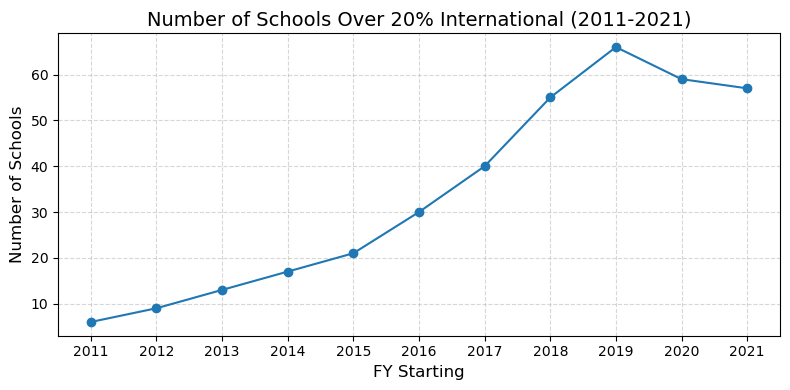

In [472]:
import matplotlib.pyplot as plt

# Initialize an empty list to store the number of schools for each year
years = list(range(2011, 2022))  # List of years from 2011 to 2021
schools_passing = []

# Loop through each year and calculate the number of schools that passed 20% international enrolment
for year in years:
    passed_count = combined_df[
        (combined_df['FY Start'] == year) &
        (combined_df['% International'] > 20) &
        (combined_df['Francophone'] == 0) &
        (~combined_df['School Name'].str.contains("Total|Average"))
    ].shape[0]
    schools_passing.append(passed_count)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(years, schools_passing, marker='o', linestyle='-')
plt.title('Number of Schools Over 20% International (2011-2021)', fontsize=14)
plt.xlabel('FY Starting', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.xticks(years)  # Ensure all years are shown on the x-axis
plt.tight_layout()
plt.show()

In [476]:
# The peak was in 2019, before COVID hit. How many schools?
combined_df[
    (combined_df['FY Start'] == 2019) &
    (combined_df['% International'] > 20) &
    (combined_df['Francophone'] == 0) &
    (~combined_df['School Name'].str.contains("Total|Average"))
].shape

(66, 7)

As you can see, 2021 is actually a two-year low from **the peak in 2019, where 66 schools** already had more than 20% international students.

Let's check the 2021 entrants and where they were in 2019 - were they below the threshold still accelerating, or were they already there but stalled by covid?

In [481]:
# Step 1: Identify the schools that were above the 20% Int'l in 2021
schools_above_20_in_2021 = combined_df[(combined_df['FY Start'] == 2021) & (combined_df['% International'] > 20) & (combined_df['Francophone'] == 0) & (~combined_df['School Name'].str.contains("Total|Average"))
]['School Name'].unique()

# Step 2: Retrieve the 2021 Percentages for these schools
percentages_2021 = combined_df[(combined_df['FY Start'] == 2021) & (combined_df['School Name'].isin(schools_above_20_in_2021))
][['School Name', '% International']].rename(columns={'% International': '% Intl 2021'})

# Step 3: Retrieve the 2019 percentages for the same schools
percentages_2019 = combined_df[(combined_df['FY Start'] == 2019) & (combined_df['School Name'].isin(schools_above_20_in_2021))
][['School Name', '% International']].rename(columns={'% International': '% Intl 2019'})

# Step 4: Merge the 2019 and 2021 percentages to calculate the change
percent_change = pd.merge(percentages_2019, percentages_2021, on='School Name', how='inner')
percent_change['Change in %'] = percent_change['% Intl 2021'] - percent_change['% Intl 2019']

# Display the result
percent_change.sort_values(by='Change in %', ascending=False)

School Name  % Intl 2019  % Intl 2021  \
5                           Canadore College        38.57        74.77   
26                          Loyalist College        36.84        69.23   
40                             Sault College        26.85        58.26   
45                         St. Clair College        20.40        47.42   
23           Kwantlen Polytechnic University        32.26        44.73   
24                           Lambton College        72.53        84.70   
0                          Algoma University        56.61        68.06   
55               Vancouver Community College        40.87        50.52   
9                     Coast Mountain College        47.23        56.22   
42                            Seneca College        37.10        45.28   
11                         Conestoga College        49.38        56.32   
31                    Niagara College Canada        33.78        40.50   
46                      St. Lawrence College        41.99        48.34   
4                           Cambrian College        52.51        58.81   
32                          NorQuest College        18.95        23.46   
36                           OCAD University        24.07        28.11   
15   Emily Carr University of Art and Design        29.84        33.33   
52                     University of Toronto        25.62        28.92   
54                     University of Windsor        23.29        26.21   
30           New Brunswick Community College        20.67        23.57   
35                   Northern Lights College        52.72        55.56   
19                          Georgian College        32.16        34.84   
50  University of Ottawa-Université d'Ottawa        19.60        21.77   
18                      George Brown College        25.50        27.52   
49                    University of Manitoba        21.33        23.24   
16                          Fanshawe College        32.52        34.17   
21               Humber College North Campus        24.43        25.90   
51        University of Prince Edward Island        29.22        30.39   
28            Mount Saint Vincent University        23.40        24.30   
56                           York University        19.30        20.03   
25                           Langara College        47.18        47.80   
3                          Burman University        20.41        20.72   
1              Assiniboine Community College        22.78        22.89   
48            University of British Columbia        28.38        27.90   
12                     Confederation College        23.49        22.91   
53                    University of Waterloo        23.13        22.51   
20                           Holland College        21.83        20.99   
44                   Simon Fraser University        22.85        22.01   
2                         Bow Valley College        24.88        23.15   
13                      Dalhousie University        25.17        23.44   
27                         McGill University        34.21        31.51   
34                          Northern College        78.92        76.02   
41                           Selkirk College        44.85        41.76   
39                   Saint Mary's University        34.59        31.49   
22     Justice Institute of British Columbia        35.67        32.44   
14                           Douglas College        37.92        34.54   
47                Thompson Rivers University        42.14        38.63   
43  Sheridan College Institute of Technology        32.83        27.39   
17                           Fleming College        30.25        24.34   
29                          NSCAD University        28.92        21.59   
8                         Centennial College        51.53        43.75   
37                          Okanagan College        31.78        22.55   
7                        Capilano University        43.06        33.35   
38                    Royal Roads Uni

In [491]:
print(f"Of the 57 schools over 20% in 2021, {percent_change[percent_change['% Intl 2019'] > 20].shape[0]} were already over in 2019")
print(f"Of the 57 schools over 20% in 2021, {percent_change[percent_change['% Intl 2019'] > 33].shape[0]} were already over 33% in 2019")
print(f"Of the 57 schools over 20% in 2021, {percent_change[percent_change['% Intl 2019'] > 50].shape[0]} were already over 50% in 2019")

Of the 57 schools over 20% in 2021, 54 were already over in 2019
Of the 57 schools over 20% in 2021, 26 were already over 33% in 2019
Of the 57 schools over 20% in 2021, 8 were already over 50% in 2019


See above print text.

**The picture emerging is that the schools that had leaned into international the most by 2021 had already done so by 2019.** COVID-19 either substantially reversed that large increase between 2011 and 2019, or they punched straight through it, presumably by online offerings in the interim.

Below we look at the schools that held steady in the COVID period:

In [487]:
steady_19_to_21 = percent_change[(percent_change['Change in %'] < 5) & (percent_change['Change in %'] > -5)]

print(steady_19_to_21.shape)

(33, 4)


The above shows over half (33) of the 56 schools over 20% Int'l in 2021 stayed stable in their composition during the COVID pandemic. Their change in international student percentage did not swing more than 5% up or down.

All but three of the 33 'steady' schools were already at 25% by 2019.

Only 9 of those 33 'steadies' had exceeded the 33% int'l by 2019. The general group of 57 schools over 20% int'l had 26 schools that exceeded 33%.

In [ ]:
# Below - 28 Schools over 20% international in 2019 that stayed steady through Covid
print(steady_19_to_21[steady_19_to_21['% Intl 2019'] > 20].shape[0])

# Below - 7 Schools over 33% international in 2019 that stayed steady through Covid.
print(steady_19_to_21[steady_19_to_21['% Intl 2019'] > 33].shape[0])

30
9


In other words, the schools that more significantly changed composition during COVID were twice as likely to be more than 33% international students. 

This feels quite obvious if you consider *reduced* international students during COVID, but actually **more of these schools *increased* international composition during this time than decreased. See below:**

In [ ]:
# Filter for schools with a change in the Int/Dom ratio that is not between -0.1 and 0.1
unsteady_schools = ratios_change[
    (ratios_change['Change in Ratio'] < -0.1) | (ratios_change['Change in Ratio'] > 0.1)
]

# schools that went up in international composition
print(f"{unsteady_schools[unsteady_schools['Change in Ratio'] > 0].shape[0]} Schools increased international student ratio significantly during 2019-2021")
print(unsteady_schools[unsteady_schools['Change in Ratio'] > 0]["School Name"])
print("\n")

# schools that went down in international composition
print(f"{unsteady_schools[unsteady_schools['Change in Ratio'] < 0].shape[0]} Schools decreased international student ratio significantly during 2019-2021")
print(unsteady_schools[unsteady_schools['Change in Ratio'] < 0]['School Name'])

15 Schools increased international student ratio significantly during 2019-2021
0                   Algoma University
4                    Cambrian College
5                    Canadore College
9              Coast Mountain College
11                  Conestoga College
23    Kwantlen Polytechnic University
24                    Lambton College
26                   Loyalist College
31             Niagara College Canada
35            Northern Lights College
40                      Sault College
42                     Seneca College
45                  St. Clair College
46               St. Lawrence College
55        Vancouver Community College
Name: School Name, dtype: object


11 Schools decreased international student ratio significantly during 2019-2021
6                       Cape Breton University
7                          Capilano University
8                           Centennial College
10                    College of New Caledonia
17                             Fleming College


The overall conclusion of the COVID pandemic (particularly 20/21 and partially 21/22 AY) is that the schools which changed their International/Domestic ratio most significantly were most significantly changed during this period, whether they continued to ramp up international enrollment significantly or that it declined most significantly, as in 4 of the 5 hardest declines fro 2019-2021 were over half international in 2019.

And as we examine these schools, a reminder all the other PSIs in the Canadian ecosystem are still below one in five in 2021.

I will add the A/Y 2022-23 to this data soon to see changes

### Some small schools **exploded** into international growth

I used a 0.25 Int/Dom ratio, or one in five student are international, as a marker of schools that serve a significant international student populace relative to their size. 

Six schools were there in 2011, 57 were there in 2021 as discussed above, but a lot of schools went well beyond the one in five 'lower boundary'. 

Below we can see 26 of those went above 0.5 Int/Dom, i.e. a one in three are International

In [ ]:
# nearly half of the schools that broke 0.25 Int/Dom in 2021 also exceeded 0.5 - at least one in three enrolled is international.
combined_df[
    (combined_df['FY Start'] == 2021) &
    (combined_df['Int/Dom Ratio'] > 0.5) &
    (combined_df['Francophone'] == 0) &
    (~combined_df['School Name'].str.contains("Total|Average"))
].shape

(26, 7)

Is there a pattern to where these schools are? In 2011, the six schools were scattered across the country, in 2021?... 

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with two columns for the pie charts
fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],  # Specify the type as 'domain' for pie charts
    subplot_titles=(
        'Schools with one in five international, 2021',
        'Schools with one in three, 2021'
    )
)

# Filter the data for the first pie chart
data_25 = combined_df[
    (combined_df['FY Start'] == 2021) &
    (combined_df['Int/Dom Ratio'] > 0.25) &
    (combined_df['Francophone'] == 0) &
    (~combined_df['School Name'].str.contains("Total|Average"))
]

# Filter the data for the second pie chart
data_50 = combined_df[
    (combined_df['FY Start'] == 2021) &
    (combined_df['Int/Dom Ratio'] > 0.5) &
    (combined_df['Francophone'] == 0) &
    (~combined_df['School Name'].str.contains("Total|Average"))
]

# Add the first pie chart to the subplot
fig.add_trace(
    go.Pie(
        labels=data_25['Province/Territory'],
        title='Int/Dom Ratio > 0.25',
        textinfo='percent+label',
        hole=0.3  # Optional: make it a donut chart
    ),
    row=1, col=1
)

# Add the second pie chart to the subplot
fig.add_trace(
    go.Pie(
        labels=data_50['Province/Territory'],
        title='Int/Dom Ratio > 0.5',
        textinfo='percent+label',
        hole=0.3  # Optional: make it a donut chart
    ),
    row=1, col=2
)

# Update the layout of the figure
fig.update_layout(
    template='plotly_dark'
)

# Show the figure
fig.show()

How extensive has the transition been in some schools?

Below are the schools with an Int/Dom ratio over 1.0, so the majority of their students are now international.

In [ ]:
# schools with >1.0 int/dom ratio in 2021
combined_df[
    (combined_df['FY Start'] == 2021) &
    (combined_df['Int/Dom Ratio'] > 1.0) &
    (combined_df['Francophone'] == 0) &
    (~combined_df['School Name'].str.contains("Total|Average"))
]

School Name Province/Territory  FY Start  \
35              Algoma University            Ontario      2021   
177              Cambrian College            Ontario      2021   
221              Canadore College            Ontario      2021   
298        Coast Mountain College   British Columbia      2021   
623             Conestoga College            Ontario      2021   
1412              Lambton College            Ontario      2021   
1456             Loyalist College            Ontario      2021   
1688             Northern College            Ontario      2021   
1710      Northern Lights College   British Columbia      2021   
1921                Sault College            Ontario      2021   
2462  Vancouver Community College   British Columbia      2021   

      Domestic Enrolment  International Enrolment  Francophone  Int/Dom Ratio  
35                   780                     1662            0          2.131  
177                 2853                     4074            0          1.428  
221                 1878                     5565            0          2.963  
298                  243                      312            0          1.284  
623                 8391                    10821            0          1.290  
1412                1809                    10011            0          5.534  
1456                1668                     3753            0          2.250  
1688                 990                     3138            0          3.170  
1710                 360                      450            0          1.250  
1921                1326                     1851            0          1.396  
2462                1002                     1023            0          1.021

These schools with an Int/Dom Ratio over 1 now have the majority of their operations for international students. There are a few things that make these schools noticeable:

- They are usually small colleges with enrolment in the 1,000-3,000 domestic mark that have enrolled that number or multiple times that number in international students in this ten year period. 
- None of the original >0.25 ratio schools in 2011 are in this list. These schools have set upon a different operating model than the 'traditional internationals'

I will refer to them as **transformers** characterised by that initially small domestic status. For the most part, they started 2011 as small institutions that had next to no international student representation. In the period from 2011-2021 most of them even declined domestically as they grew internationally.

In [ ]:
# look at the schools with >1.0 int/dom ratio (over half) in 2021 but in 2011
over_half_schools = combined_df[
    (combined_df['FY Start'] == 2021) &
    (combined_df['Int/Dom Ratio'] > 1.0) &
    (combined_df['Francophone'] == 0) &
    (~combined_df['School Name'].str.contains("Total|Average"))
]['School Name'].unique()

# Filter the data for these schools in 2011
combined_df[
    (combined_df['FY Start'] == 2011) &
    (combined_df['School Name'].isin(over_half_schools))
]

School Name Province/Territory  FY Start  \
25              Algoma University            Ontario      2011   
167              Cambrian College            Ontario      2011   
211              Canadore College            Ontario      2011   
288        Coast Mountain College   British Columbia      2011   
613             Conestoga College            Ontario      2011   
1402              Lambton College            Ontario      2011   
1446             Loyalist College            Ontario      2011   
1678             Northern College            Ontario      2011   
1700      Northern Lights College   British Columbia      2011   
1911                Sault College            Ontario      2011   
2452  Vancouver Community College   British Columbia      2011   

      Domestic Enrolment  International Enrolment  Francophone  Int/Dom Ratio  
25                   819                       72            0          0.088  
167                 4194                       78            0          0.019  
211                 1287                      129            0          0.100  
288                  642                        0            0          0.000  
613                 8886                      633            0          0.071  
1402                6858                      186            0          0.027  
1446                3108                       27            0          0.009  
1678                1308                        3            0          0.002  
1700                 411                       21            0          0.051  
1911                2346                        3            0          0.001  
2452                1536                      120            0          0.078

It is true that the smaller schools recruiting international students will have this ratio change more dramatically - 



#### Different provinces had different numbers of **'transformers'**

- These are **initially small institutions in 2011 which had their ratio of international to domestic students massively change in this 2011-2021 period.** They are distinct from schools which already began the period with a significant international student representation such as Centennial College, or added a lot of international students but were already large domestically like Seneca, George Brown or York University. With domestic enrolment flatlined virtually everywhere nationally, it's not unreasonable that these previously small schools that have rapidly grown almost entirely off of international students are threatened the most with any restrictions to the flow of international students, as they cannot even rely on a sizeable domestic student populace to serve and receive funding.

- **Ontario has the most explosive transformers** - Lambton College, Northern College, Canadore College, Algoma University, Cambrian College, Loyalist College and Conestoga College all began the period with at most 10% international student enrolment. With the exception of Conestoga College at 8000 domestic students, these were small sub-5000 student schools with 2011 international student numbers often in the three figures. All of these schools entered 2021-22 with international students making at least the majorty of their student body, often multiple times the domestic count, like Lambton College which had 5.5 international students for every domestic student in 2021, and Algoma, Loyalist, Canadore and Northern College all above 2-to-1.
    - **Lambton College has strange data in 11-12 and 12-13 where Domestic enrolment then drops off a cliff for 13-14. I will check the MCU (provincial body) data for clarity, as it's more granular, but I suspect their domestic enrolment is around the 2-3k mark in 2011-2013.**
    
    - **Cambrian College also had some early data in the MCU repository clouded by the 'Other' Category.**

- **BC's transformers were not nearly as explosive as those in Ontario**. No BC institution broke the 1.5-to-1 international/domestic by 2021 which was near the lower boundary for the explosive growers in Ontario. In BC, Coast Mountain College (CMC), Northern Lights College, Langara College, College of New Caledonia (CNC) Kwantlen Polytechnic University (KPU), Vancouver Community College (VCC) and Selkirk College grew the highest share of international students in their makeup, all starting 2011 with a 0.1 Intl/Domestic ratio and all touched or exceeded 0.8 at some point in the most recent 3-4 years of the reference period. Some have peaked and dropped off like CNC, but it may be COVID related in 2020-2021.

    - If we are trying to identify transformers as *small* schools that effectively changed their principal market from domestic to international, a *small school* is going to be smaller in BC than in ON by virtue of ON being nearly 3x the population. 
        - Langara began 2011 with 5,700 domestic students, KPU with 8,200 and this puts them in the category of  where the others were around 2,000 or below. Langara and KPU have both effectively become equal domestic and international students, closing a gap of 5.5-8k students.

        - Coast Mountain College and Northern Lights College are both sub-1000 domestic enrolment in 2011 so their ratios are going to be more sensitive to raw numbers.

- Transformers were often but not always colleges - Cape Breton University, Algoma University and Kwantlen Polytechnic University all rapidly grew in international students with a small domestic base.

#### The large established colleges (George Brown, Seneca, Centennial, TRU)

## High-level conclusions:

Any relationship to population growth?

## Next Steps